In [71]:
import pandas as pd
from numpy import argmax
import statistics
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from zipfile import ZipFile
file_name = "New Dataset/system_calls.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Unzipped system_calls.zip')

Unzipped system_calls.zip


In [3]:
# Reading counts.txt and storing in panads df
counts_text = pd.read_csv("New Dataset/counts.txt")

In [4]:
# Opening the extracted sys_calls file and replacing ':' with ','

# List that holds the priginal dataset in string format
system_calls = []
i = 0

with open('system_calls.txt') as f:
    while True:
        request = f.readline()
        if(len(request) == 0):
            break
        system_calls.append(request)
        i += 1
for i in range(len(system_calls)):
    system_calls[i] = system_calls[i].replace(":",",")

In [5]:
len(system_calls)
system_calls[0][-1]

'\n'

In [6]:
# Saving replaced file as "dataset.txt"
f = open("dataset.txt", "w")
for i in range(len(system_calls)):
    f.write(system_calls[i])
f.close()

# dataset.txt which contains IDs and system call sequences can now be used as a csv 

In [7]:
# Printing count.txt using column names
counts_text['ID']

0        15403_12_1558061203352552595
1        15403_12_1558061203873994946
2        15403_12_1558061203901555711
3        15403_12_1558061203925100262
4        15403_12_1558061203961228441
                     ...             
46682    15698_12_1558061453221782438
46683    15698_12_1558061453405086529
46684    15698_12_1558061453589605045
46685    15698_12_1558061453776009239
46686    15698_12_1558061453953786306
Name: ID, Length: 46687, dtype: object

In [8]:
# Dictionary that maps request ID to completion time
ID_to_Time_dict = {}

# This loop run through the counts_txt table and maps the keys(IDs) to the values (Time taken)
for i in range(len(counts_text['Time'])):
    ID_to_Time_dict[counts_text['ID'][i]] = counts_text['Time'][i]


In [9]:
len(ID_to_Time_dict)

45413

In [10]:
# List that hold all the request time taken
req_durations = []

file = open("Dataset.txt","w")

def write_to_file(req):
    if req[0] in ID_to_Time_dict:
        file.write(req[0])
        file.write(",")
        file.write(str(ID_to_Time_dict[str(req[0])]))
        req_durations.append(int(ID_to_Time_dict[str(req[0])]))
        file.write(",")
        for i in range(1,len(req)):
            file.write(req[i])
            if i != len(req) -1 :
                file.write(",")
    

for i in range(len(system_calls)):
    write_to_file(system_calls[i].split(","))

file.close()


In [11]:
file = open("Dataset.txt","r")
requests= []
while True:
    line = file.readline()
    if(len(line) == 0):
        break
    requests.append(line.split(","))
    


In [12]:
len(requests)

45413

In [13]:
# List which holds all unique system calls present in the dataset
unique_system_calls = []

for i in range(len(requests)):
    for j in range(2,len(requests[i])):
        if requests[i][j] not in unique_system_calls and requests[i][j] != '$\n':
            unique_system_calls.append(requests[i][j])
        

In [14]:
# Unique system calls present in the dataset

print(unique_system_calls)
print(len(unique_system_calls))

['getsockname', 'fcntl', 'mmap', 'read', 'newstat', 'open', 'newfstat', 'close', 'brk', 'setitimer', 'rt_sigaction', 'rt_sigprocmask', 'getcwd', 'chdir', 'access', 'getdents', 'sysinfo', 'socket', 'connect', 'poll', 'recvfrom', 'sendto', 'newlstat', 'munmap', 'madvise', 'nanosleep', 'writev', 'write', 'times', 'shutdown', 'accept4']
31


In [15]:
# Mapping system call names to unique integers
system_call_to_value_dict = {}
num = 1
for i in range(len(unique_system_calls)):
    system_call_to_value_dict[str(unique_system_calls[i])] = num
    num += 1

In [16]:
# Dictionary holding the mappings
system_call_to_value_dict 

{'getsockname': 1,
 'fcntl': 2,
 'mmap': 3,
 'read': 4,
 'newstat': 5,
 'open': 6,
 'newfstat': 7,
 'close': 8,
 'brk': 9,
 'setitimer': 10,
 'rt_sigaction': 11,
 'rt_sigprocmask': 12,
 'getcwd': 13,
 'chdir': 14,
 'access': 15,
 'getdents': 16,
 'sysinfo': 17,
 'socket': 18,
 'connect': 19,
 'poll': 20,
 'recvfrom': 21,
 'sendto': 22,
 'newlstat': 23,
 'munmap': 24,
 'madvise': 25,
 'nanosleep': 26,
 'writev': 27,
 'write': 28,
 'times': 29,
 'shutdown': 30,
 'accept4': 31}

In [17]:
# Converting system calls names to unique integers
for i in range(len(requests)):
    for j in range(len(requests[i])):
            if requests[i][j] in system_call_to_value_dict:
                requests[i][j] = int(system_call_to_value_dict[requests[i][j]])

In [18]:
# Statistics of the time taken by the requests

nano = 100000000

# List containing numbers from 1 to n, where n = total number of requests
num_requests = [i for i in range(1,len(req_durations)+1)]
# List containing durations of requests
req_durations = [req_durations[i]/nano for i in range(len(req_durations))]
# list containing length of requests
req_lengths = [len(requests[i]) for i in range(len(requests))]


# variables for storing Duration stats
maximum_dur = max(req_durations)
minimum_dur = min(req_durations)
mean_dur = statistics.mean(req_durations)
std_dev_dur = statistics.stdev(req_durations)

print("STATISTICS ON DURATION")
print("Maximum: ", maximum_dur)
print("Minimum: ", minimum_dur)
print("Mean: ", mean_dur)
print("Standard Deviation: ", std_dev_dur)



STATISTICS ON DURATION
Maximum:  223.81729449
Minimum:  0.00143172
Mean:  1.3914579438962411
Standard Deviation:  5.113169024522863


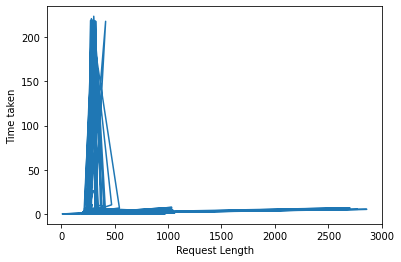

In [19]:
plt.plot(req_lengths,req_durations)
plt.xlabel("Request Length")
plt.ylabel("Time taken")
plt.show()

In [20]:
# List containing length/duration ratio of requests
length_duration_ratio = []

for i in range(len(req_durations)):
    length_duration_ratio.append(req_lengths[i]/req_durations[i])



In [21]:
#variables for storing Duration stats

maximum_ratio = max(length_duration_ratio)
minimum_ratio = min(length_duration_ratio)
mean_ratio = statistics.mean(length_duration_ratio)
std_dev_ratio = statistics.stdev(length_duration_ratio)

print("STATISTICS ON RATIO(LENGTH/DURATION)")
print("Maximum: ", maximum_ratio)
print("Minimum: ", minimum_ratio)
print("Mean: ", mean_ratio)
print("Standard Deviation: ", std_dev_ratio)

STATISTICS ON RATIO(LENGTH/DURATION)
Maximum:  9079.987707093565
Minimum:  1.2637585718500415
Mean:  225.642070835443
Standard Deviation:  108.05662936006965


In [22]:
# Threshod for anomalies
th = mean_ratio + (std_dev_ratio)
counter = 0

for i in range(len(length_duration_ratio)):
    if length_duration_ratio[i] > th:
        counter += 1

In [23]:
th

333.69870019551263

In [24]:
counter

4685

In [25]:
len(requests)

45413

In [26]:
# List contaning all the anomolous requests
anomaly = []
# List containing all the normal requests
normal = []


def append_arr(arr,n):
    temp = []
    del arr[-1]
    if n == 1:
        for i in range(2,len(arr)):
            temp.append(arr[i])
    else:
        for i in range(2,len(arr)):
            temp.append(arr[i])
    return temp 
        
    
for i in range(len(length_duration_ratio)):
    if length_duration_ratio[i] > th:
        anomaly.append(append_arr(requests[i],1))
    else:
        normal.append(append_arr(requests[i],0))
        


In [27]:
len(anomaly)

4685

In [28]:
#Generating one hot vectors
dict = {}
vocab_size = 60

for x in range(vocab_size):
    arr=[]
    arr = [0 for i in range(vocab_size)] 
    arr[x] = 1
    dict[x] = arr

In [36]:
#Sequence size
n = 15
#N-Gram
m = 3

In [37]:
# This method receives a request array and returns one hot encoded version of that array
def generate_trainSet(request):
    temp = []
    for sys_call in request:
        temp.append(dict[sys_call])
    return temp

# This method recevies a request array, start and  end of the request and populates x_train and y_train
# with returned one hot version from the generate_trainSet method
def split_request(source, target, request, start, end):
    while(len(request)-start >= n+m):
        source.append(generate_trainSet(request[start:end]))
        start += m
        end += m
        target.append(generate_trainSet(request[start:end]))

In [59]:
x_train = []
y_train = [] 

# Populating x_train and y_train with sources and targets
for i in range(int(len(normal)/30)):
    split_request(x_train, y_train, normal[i],0,n)

In [60]:
print(len(x_train))

104610


In [61]:
# Converting x_train and y_train into np arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [62]:
#x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(104610, 15, 60)


In [63]:
# split test data into training and testing sets
x_train, x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=4)

In [64]:
n_timesteps = n
n_features = vocab_size
numberOfUnits = 200

input= Input(shape=(n_timesteps, n_features))

lstm1 = LSTM(numberOfUnits,return_sequences=True, return_state=True)
all_state_h, state_h, state_c = lstm1(input) 
states = [state_h, state_c]

lstm2 = LSTM(numberOfUnits,return_sequences=True)
all_state_h = lstm2(all_state_h,initial_state=states)

dense = (Dense(n_features, activation='softmax'))
output = dense(all_state_h)
model_LSTM_return_sequences_return_state = Model(input,output,
                                name='model_LSTM_all_state_h_return_state')
model_LSTM_return_sequences_return_state.compile(loss='categorical_crossentropy', 
                                                 optimizer='adam',
                                                 metrics=['accuracy'])
model_LSTM_return_sequences_return_state.summary()

Model: "model_LSTM_all_state_h_return_state"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 15, 60)]     0           []                               
                                                                                                  
 lstm_4 (LSTM)                  [(None, 15, 200),    208800      ['input_3[0][0]']                
                                 (None, 200),                                                     
                                 (None, 200)]                                                     
                                                                                                  
 lstm_5 (LSTM)                  (None, 15, 200)      320800      ['lstm_4[0][0]',                 
                                                                

In [65]:
def train_test(model, X_train, y_train , 
               X_test, 	y_test, epochs=50, 
							        verbose=0, patience=5):
	# patient early stopping
	#es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1, patience=20)
	es = EarlyStopping(monitor='val_loss', mode='min', 
	                   verbose=1, patience=patience)
	# train model
	print('training for ',epochs,
	      ' epochs begins with',
				' EarlyStopping(monitor= val_loss ',
				' patience=',patience,')....')
	history=model.fit(X_train, y_train, validation_split= 0.1, epochs=epochs,  verbose=verbose, callbacks=[es])
	print(epochs,' epoch training finished...')

	# report training
	# list all data in history
	print(history.history.keys())
	# evaluate the model
	_, train_acc = model.evaluate(X_train, y_train, verbose=0)
	_, test_acc = model.evaluate(X_test, 	y_test, verbose=0)
	print('\nPREDICTION ACCURACY (%):')
	print('Train: %.3f, Test: %.3f' % (train_acc*100, test_acc*100))
	# summarize history for accuracy
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title(model.name+' accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()
	# summarize history for loss
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title(model.name+' loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

training for  50  epochs begins with  EarlyStopping(monitor= val_loss   patience= 5 )....
Epoch 28: early stopping
50  epoch training finished...
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

PREDICTION ACCURACY (%):
Train: 98.713, Test: 98.592


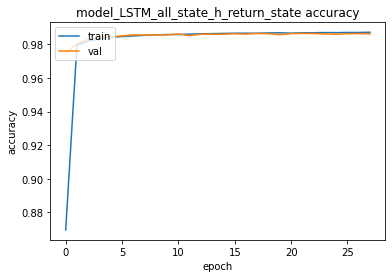

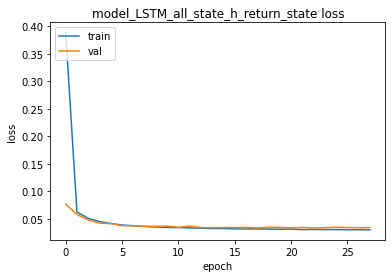

In [66]:
train_test(model_LSTM_return_sequences_return_state, x_train, y_train , x_test, y_test)

In [67]:
def one_hot_decode(arr):
    for index,num in enumerate(arr):
        if num == 1:
            return index

def decode(arr, three_d_array):
    for seq in three_d_array:
        temp = []
        for one_hot in seq:
            temp.append(one_hot_decode(one_hot))
        arr.append(temp)
    
        

In [68]:
def prediction_decode(arr, prediction):
    for seq in prediction:
        predict_temp = []
        for one_hot in seq:
            predict_temp.append(argmax(one_hot))
        arr.append(predict_temp)
    
    

In [69]:
# Decoded vectors x_test and y_test
x_test_decoded = []
y_test_decoded = []
i = 1

#For simplicity, test number
test_number = len(x_test)

while(i < test_number):
    decode(x_test_decoded,x_test[i-1:i])
    decode(y_test_decoded,y_test[i-1:i])
    i += 1

In [72]:
predictions = []
i = 1
while(i < test_number):
    prediction_decode(predictions, model_LSTM_return_sequences_return_state.predict(x_test[i-1:i]))
    print(i, "/", test_number)
    i += 1



1 / 20922
2 / 20922
3 / 20922
4 / 20922
5 / 20922
6 / 20922
7 / 20922
8 / 20922
9 / 20922
10 / 20922
11 / 20922
12 / 20922
13 / 20922
14 / 20922
15 / 20922
16 / 20922
17 / 20922
18 / 20922
19 / 20922
20 / 20922
21 / 20922
22 / 20922
23 / 20922
24 / 20922
25 / 20922
26 / 20922
27 / 20922
28 / 20922
29 / 20922
30 / 20922
31 / 20922
32 / 20922
33 / 20922
34 / 20922
35 / 20922
36 / 20922
37 / 20922
38 / 20922
39 / 20922
40 / 20922
41 / 20922
42 / 20922
43 / 20922
44 / 20922
45 / 20922
46 / 20922
47 / 20922
48 / 20922
49 / 20922
50 / 20922
51 / 20922
52 / 20922
53 / 20922
54 / 20922
55 / 20922
56 / 20922
57 / 20922
58 / 20922
59 / 20922
60 / 20922
61 / 20922
62 / 20922
63 / 20922
64 / 20922
65 / 20922
66 / 20922
67 / 20922
68 / 20922
69 / 20922
70 / 20922
71 / 20922
72 / 20922
73 / 20922
74 / 20922
75 / 20922
76 / 20922
77 / 20922
78 / 20922
79 / 20922
80 / 20922
81 / 20922
82 / 20922
83 / 20922
84 / 20922
85 / 20922
86 / 20922
87 / 20922
88 / 20922
89 / 20922
90 / 20922
91 / 20922
92 / 209

696 / 20922
697 / 20922
698 / 20922
699 / 20922
700 / 20922
701 / 20922
702 / 20922
703 / 20922
704 / 20922
705 / 20922
706 / 20922
707 / 20922
708 / 20922
709 / 20922
710 / 20922
711 / 20922
712 / 20922
713 / 20922
714 / 20922
715 / 20922
716 / 20922
717 / 20922
718 / 20922
719 / 20922
720 / 20922
721 / 20922
722 / 20922
723 / 20922
724 / 20922
725 / 20922
726 / 20922
727 / 20922
728 / 20922
729 / 20922
730 / 20922
731 / 20922
732 / 20922
733 / 20922
734 / 20922
735 / 20922
736 / 20922
737 / 20922
738 / 20922
739 / 20922
740 / 20922
741 / 20922
742 / 20922
743 / 20922
744 / 20922
745 / 20922
746 / 20922
747 / 20922
748 / 20922
749 / 20922
750 / 20922
751 / 20922
752 / 20922
753 / 20922
754 / 20922
755 / 20922
756 / 20922
757 / 20922
758 / 20922
759 / 20922
760 / 20922
761 / 20922
762 / 20922
763 / 20922
764 / 20922
765 / 20922
766 / 20922
767 / 20922
768 / 20922
769 / 20922
770 / 20922
771 / 20922
772 / 20922
773 / 20922
774 / 20922
775 / 20922
776 / 20922
777 / 20922
778 / 20922
779 

1351 / 20922
1352 / 20922
1353 / 20922
1354 / 20922
1355 / 20922
1356 / 20922
1357 / 20922
1358 / 20922
1359 / 20922
1360 / 20922
1361 / 20922
1362 / 20922
1363 / 20922
1364 / 20922
1365 / 20922
1366 / 20922
1367 / 20922
1368 / 20922
1369 / 20922
1370 / 20922
1371 / 20922
1372 / 20922
1373 / 20922
1374 / 20922
1375 / 20922
1376 / 20922
1377 / 20922
1378 / 20922
1379 / 20922
1380 / 20922
1381 / 20922
1382 / 20922
1383 / 20922
1384 / 20922
1385 / 20922
1386 / 20922
1387 / 20922
1388 / 20922
1389 / 20922
1390 / 20922
1391 / 20922
1392 / 20922
1393 / 20922
1394 / 20922
1395 / 20922
1396 / 20922
1397 / 20922
1398 / 20922
1399 / 20922
1400 / 20922
1401 / 20922
1402 / 20922
1403 / 20922
1404 / 20922
1405 / 20922
1406 / 20922
1407 / 20922
1408 / 20922
1409 / 20922
1410 / 20922
1411 / 20922
1412 / 20922
1413 / 20922
1414 / 20922
1415 / 20922
1416 / 20922
1417 / 20922
1418 / 20922
1419 / 20922
1420 / 20922
1421 / 20922
1422 / 20922
1423 / 20922
1424 / 20922
1425 / 20922
1426 / 20922
1427 / 20922

1983 / 20922
1984 / 20922
1985 / 20922
1986 / 20922
1987 / 20922
1988 / 20922
1989 / 20922
1990 / 20922
1991 / 20922
1992 / 20922
1993 / 20922
1994 / 20922
1995 / 20922
1996 / 20922
1997 / 20922
1998 / 20922
1999 / 20922
2000 / 20922
2001 / 20922
2002 / 20922
2003 / 20922
2004 / 20922
2005 / 20922
2006 / 20922
2007 / 20922
2008 / 20922
2009 / 20922
2010 / 20922
2011 / 20922
2012 / 20922
2013 / 20922
2014 / 20922
2015 / 20922
2016 / 20922
2017 / 20922
2018 / 20922
2019 / 20922
2020 / 20922
2021 / 20922
2022 / 20922
2023 / 20922
2024 / 20922
2025 / 20922
2026 / 20922
2027 / 20922
2028 / 20922
2029 / 20922
2030 / 20922
2031 / 20922
2032 / 20922
2033 / 20922
2034 / 20922
2035 / 20922
2036 / 20922
2037 / 20922
2038 / 20922
2039 / 20922
2040 / 20922
2041 / 20922
2042 / 20922
2043 / 20922
2044 / 20922
2045 / 20922
2046 / 20922
2047 / 20922
2048 / 20922
2049 / 20922
2050 / 20922
2051 / 20922
2052 / 20922
2053 / 20922
2054 / 20922
2055 / 20922
2056 / 20922
2057 / 20922
2058 / 20922
2059 / 20922

2615 / 20922
2616 / 20922
2617 / 20922
2618 / 20922
2619 / 20922
2620 / 20922
2621 / 20922
2622 / 20922
2623 / 20922
2624 / 20922
2625 / 20922
2626 / 20922
2627 / 20922
2628 / 20922
2629 / 20922
2630 / 20922
2631 / 20922
2632 / 20922
2633 / 20922
2634 / 20922
2635 / 20922
2636 / 20922
2637 / 20922
2638 / 20922
2639 / 20922
2640 / 20922
2641 / 20922
2642 / 20922
2643 / 20922
2644 / 20922
2645 / 20922
2646 / 20922
2647 / 20922
2648 / 20922
2649 / 20922
2650 / 20922
2651 / 20922
2652 / 20922
2653 / 20922
2654 / 20922
2655 / 20922
2656 / 20922
2657 / 20922
2658 / 20922
2659 / 20922
2660 / 20922
2661 / 20922
2662 / 20922
2663 / 20922
2664 / 20922
2665 / 20922
2666 / 20922
2667 / 20922
2668 / 20922
2669 / 20922
2670 / 20922
2671 / 20922
2672 / 20922
2673 / 20922
2674 / 20922
2675 / 20922
2676 / 20922
2677 / 20922
2678 / 20922
2679 / 20922
2680 / 20922
2681 / 20922
2682 / 20922
2683 / 20922
2684 / 20922
2685 / 20922
2686 / 20922
2687 / 20922
2688 / 20922
2689 / 20922
2690 / 20922
2691 / 20922

3248 / 20922
3249 / 20922
3250 / 20922
3251 / 20922
3252 / 20922
3253 / 20922
3254 / 20922
3255 / 20922
3256 / 20922
3257 / 20922
3258 / 20922
3259 / 20922
3260 / 20922
3261 / 20922
3262 / 20922
3263 / 20922
3264 / 20922
3265 / 20922
3266 / 20922
3267 / 20922
3268 / 20922
3269 / 20922
3270 / 20922
3271 / 20922
3272 / 20922
3273 / 20922
3274 / 20922
3275 / 20922
3276 / 20922
3277 / 20922
3278 / 20922
3279 / 20922
3280 / 20922
3281 / 20922
3282 / 20922
3283 / 20922
3284 / 20922
3285 / 20922
3286 / 20922
3287 / 20922
3288 / 20922
3289 / 20922
3290 / 20922
3291 / 20922
3292 / 20922
3293 / 20922
3294 / 20922
3295 / 20922
3296 / 20922
3297 / 20922
3298 / 20922
3299 / 20922
3300 / 20922
3301 / 20922
3302 / 20922
3303 / 20922
3304 / 20922
3305 / 20922
3306 / 20922
3307 / 20922
3308 / 20922
3309 / 20922
3310 / 20922
3311 / 20922
3312 / 20922
3313 / 20922
3314 / 20922
3315 / 20922
3316 / 20922
3317 / 20922
3318 / 20922
3319 / 20922
3320 / 20922
3321 / 20922
3322 / 20922
3323 / 20922
3324 / 20922

3879 / 20922
3880 / 20922
3881 / 20922
3882 / 20922
3883 / 20922
3884 / 20922
3885 / 20922
3886 / 20922
3887 / 20922
3888 / 20922
3889 / 20922
3890 / 20922
3891 / 20922
3892 / 20922
3893 / 20922
3894 / 20922
3895 / 20922
3896 / 20922
3897 / 20922
3898 / 20922
3899 / 20922
3900 / 20922
3901 / 20922
3902 / 20922
3903 / 20922
3904 / 20922
3905 / 20922
3906 / 20922
3907 / 20922
3908 / 20922
3909 / 20922
3910 / 20922
3911 / 20922
3912 / 20922
3913 / 20922
3914 / 20922
3915 / 20922
3916 / 20922
3917 / 20922
3918 / 20922
3919 / 20922
3920 / 20922
3921 / 20922
3922 / 20922
3923 / 20922
3924 / 20922
3925 / 20922
3926 / 20922
3927 / 20922
3928 / 20922
3929 / 20922
3930 / 20922
3931 / 20922
3932 / 20922
3933 / 20922
3934 / 20922
3935 / 20922
3936 / 20922
3937 / 20922
3938 / 20922
3939 / 20922
3940 / 20922
3941 / 20922
3942 / 20922
3943 / 20922
3944 / 20922
3945 / 20922
3946 / 20922
3947 / 20922
3948 / 20922
3949 / 20922
3950 / 20922
3951 / 20922
3952 / 20922
3953 / 20922
3954 / 20922
3955 / 20922

4510 / 20922
4511 / 20922
4512 / 20922
4513 / 20922
4514 / 20922
4515 / 20922
4516 / 20922
4517 / 20922
4518 / 20922
4519 / 20922
4520 / 20922
4521 / 20922
4522 / 20922
4523 / 20922
4524 / 20922
4525 / 20922
4526 / 20922
4527 / 20922
4528 / 20922
4529 / 20922
4530 / 20922
4531 / 20922
4532 / 20922
4533 / 20922
4534 / 20922
4535 / 20922
4536 / 20922
4537 / 20922
4538 / 20922
4539 / 20922
4540 / 20922
4541 / 20922
4542 / 20922
4543 / 20922
4544 / 20922
4545 / 20922
4546 / 20922
4547 / 20922
4548 / 20922
4549 / 20922
4550 / 20922
4551 / 20922
4552 / 20922
4553 / 20922
4554 / 20922
4555 / 20922
4556 / 20922
4557 / 20922
4558 / 20922
4559 / 20922
4560 / 20922
4561 / 20922
4562 / 20922
4563 / 20922
4564 / 20922
4565 / 20922
4566 / 20922
4567 / 20922
4568 / 20922
4569 / 20922
4570 / 20922
4571 / 20922
4572 / 20922
4573 / 20922
4574 / 20922
4575 / 20922
4576 / 20922
4577 / 20922
4578 / 20922
4579 / 20922
4580 / 20922
4581 / 20922
4582 / 20922
4583 / 20922
4584 / 20922
4585 / 20922
4586 / 20922

5142 / 20922
5143 / 20922
5144 / 20922
5145 / 20922
5146 / 20922
5147 / 20922
5148 / 20922
5149 / 20922
5150 / 20922
5151 / 20922
5152 / 20922
5153 / 20922
5154 / 20922
5155 / 20922
5156 / 20922
5157 / 20922
5158 / 20922
5159 / 20922
5160 / 20922
5161 / 20922
5162 / 20922
5163 / 20922
5164 / 20922
5165 / 20922
5166 / 20922
5167 / 20922
5168 / 20922
5169 / 20922
5170 / 20922
5171 / 20922
5172 / 20922
5173 / 20922
5174 / 20922
5175 / 20922
5176 / 20922
5177 / 20922
5178 / 20922
5179 / 20922
5180 / 20922
5181 / 20922
5182 / 20922
5183 / 20922
5184 / 20922
5185 / 20922
5186 / 20922
5187 / 20922
5188 / 20922
5189 / 20922
5190 / 20922
5191 / 20922
5192 / 20922
5193 / 20922
5194 / 20922
5195 / 20922
5196 / 20922
5197 / 20922
5198 / 20922
5199 / 20922
5200 / 20922
5201 / 20922
5202 / 20922
5203 / 20922
5204 / 20922
5205 / 20922
5206 / 20922
5207 / 20922
5208 / 20922
5209 / 20922
5210 / 20922
5211 / 20922
5212 / 20922
5213 / 20922
5214 / 20922
5215 / 20922
5216 / 20922
5217 / 20922
5218 / 20922

5774 / 20922
5775 / 20922
5776 / 20922
5777 / 20922
5778 / 20922
5779 / 20922
5780 / 20922
5781 / 20922
5782 / 20922
5783 / 20922
5784 / 20922
5785 / 20922
5786 / 20922
5787 / 20922
5788 / 20922
5789 / 20922
5790 / 20922
5791 / 20922
5792 / 20922
5793 / 20922
5794 / 20922
5795 / 20922
5796 / 20922
5797 / 20922
5798 / 20922
5799 / 20922
5800 / 20922
5801 / 20922
5802 / 20922
5803 / 20922
5804 / 20922
5805 / 20922
5806 / 20922
5807 / 20922
5808 / 20922
5809 / 20922
5810 / 20922
5811 / 20922
5812 / 20922
5813 / 20922
5814 / 20922
5815 / 20922
5816 / 20922
5817 / 20922
5818 / 20922
5819 / 20922
5820 / 20922
5821 / 20922
5822 / 20922
5823 / 20922
5824 / 20922
5825 / 20922
5826 / 20922
5827 / 20922
5828 / 20922
5829 / 20922
5830 / 20922
5831 / 20922
5832 / 20922
5833 / 20922
5834 / 20922
5835 / 20922
5836 / 20922
5837 / 20922
5838 / 20922
5839 / 20922
5840 / 20922
5841 / 20922
5842 / 20922
5843 / 20922
5844 / 20922
5845 / 20922
5846 / 20922
5847 / 20922
5848 / 20922
5849 / 20922
5850 / 20922

6406 / 20922
6407 / 20922
6408 / 20922
6409 / 20922
6410 / 20922
6411 / 20922
6412 / 20922
6413 / 20922
6414 / 20922
6415 / 20922
6416 / 20922
6417 / 20922
6418 / 20922
6419 / 20922
6420 / 20922
6421 / 20922
6422 / 20922
6423 / 20922
6424 / 20922
6425 / 20922
6426 / 20922
6427 / 20922
6428 / 20922
6429 / 20922
6430 / 20922
6431 / 20922
6432 / 20922
6433 / 20922
6434 / 20922
6435 / 20922
6436 / 20922
6437 / 20922
6438 / 20922
6439 / 20922
6440 / 20922
6441 / 20922
6442 / 20922
6443 / 20922
6444 / 20922
6445 / 20922
6446 / 20922
6447 / 20922
6448 / 20922
6449 / 20922
6450 / 20922
6451 / 20922
6452 / 20922
6453 / 20922
6454 / 20922
6455 / 20922
6456 / 20922
6457 / 20922
6458 / 20922
6459 / 20922
6460 / 20922
6461 / 20922
6462 / 20922
6463 / 20922
6464 / 20922
6465 / 20922
6466 / 20922
6467 / 20922
6468 / 20922
6469 / 20922
6470 / 20922
6471 / 20922
6472 / 20922
6473 / 20922
6474 / 20922
6475 / 20922
6476 / 20922
6477 / 20922
6478 / 20922
6479 / 20922
6480 / 20922
6481 / 20922
6482 / 20922

7038 / 20922
7039 / 20922
7040 / 20922
7041 / 20922
7042 / 20922
7043 / 20922
7044 / 20922
7045 / 20922
7046 / 20922
7047 / 20922
7048 / 20922
7049 / 20922
7050 / 20922
7051 / 20922
7052 / 20922
7053 / 20922
7054 / 20922
7055 / 20922
7056 / 20922
7057 / 20922
7058 / 20922
7059 / 20922
7060 / 20922
7061 / 20922
7062 / 20922
7063 / 20922
7064 / 20922
7065 / 20922
7066 / 20922
7067 / 20922
7068 / 20922
7069 / 20922
7070 / 20922
7071 / 20922
7072 / 20922
7073 / 20922
7074 / 20922
7075 / 20922
7076 / 20922
7077 / 20922
7078 / 20922
7079 / 20922
7080 / 20922
7081 / 20922
7082 / 20922
7083 / 20922
7084 / 20922
7085 / 20922
7086 / 20922
7087 / 20922
7088 / 20922
7089 / 20922
7090 / 20922
7091 / 20922
7092 / 20922
7093 / 20922
7094 / 20922
7095 / 20922
7096 / 20922
7097 / 20922
7098 / 20922
7099 / 20922
7100 / 20922
7101 / 20922
7102 / 20922
7103 / 20922
7104 / 20922
7105 / 20922
7106 / 20922
7107 / 20922
7108 / 20922
7109 / 20922
7110 / 20922
7111 / 20922
7112 / 20922
7113 / 20922
7114 / 20922

7670 / 20922
7671 / 20922
7672 / 20922
7673 / 20922
7674 / 20922
7675 / 20922
7676 / 20922
7677 / 20922
7678 / 20922
7679 / 20922
7680 / 20922
7681 / 20922
7682 / 20922
7683 / 20922
7684 / 20922
7685 / 20922
7686 / 20922
7687 / 20922
7688 / 20922
7689 / 20922
7690 / 20922
7691 / 20922
7692 / 20922
7693 / 20922
7694 / 20922
7695 / 20922
7696 / 20922
7697 / 20922
7698 / 20922
7699 / 20922
7700 / 20922
7701 / 20922
7702 / 20922
7703 / 20922
7704 / 20922
7705 / 20922
7706 / 20922
7707 / 20922
7708 / 20922
7709 / 20922
7710 / 20922
7711 / 20922
7712 / 20922
7713 / 20922
7714 / 20922
7715 / 20922
7716 / 20922
7717 / 20922
7718 / 20922
7719 / 20922
7720 / 20922
7721 / 20922
7722 / 20922
7723 / 20922
7724 / 20922
7725 / 20922
7726 / 20922
7727 / 20922
7728 / 20922
7729 / 20922
7730 / 20922
7731 / 20922
7732 / 20922
7733 / 20922
7734 / 20922
7735 / 20922
7736 / 20922
7737 / 20922
7738 / 20922
7739 / 20922
7740 / 20922
7741 / 20922
7742 / 20922
7743 / 20922
7744 / 20922
7745 / 20922
7746 / 20922

8304 / 20922
8305 / 20922
8306 / 20922
8307 / 20922
8308 / 20922
8309 / 20922
8310 / 20922
8311 / 20922
8312 / 20922
8313 / 20922
8314 / 20922
8315 / 20922
8316 / 20922
8317 / 20922
8318 / 20922
8319 / 20922
8320 / 20922
8321 / 20922
8322 / 20922
8323 / 20922
8324 / 20922
8325 / 20922
8326 / 20922
8327 / 20922
8328 / 20922
8329 / 20922
8330 / 20922
8331 / 20922
8332 / 20922
8333 / 20922
8334 / 20922
8335 / 20922
8336 / 20922
8337 / 20922
8338 / 20922
8339 / 20922
8340 / 20922
8341 / 20922
8342 / 20922
8343 / 20922
8344 / 20922
8345 / 20922
8346 / 20922
8347 / 20922
8348 / 20922
8349 / 20922
8350 / 20922
8351 / 20922
8352 / 20922
8353 / 20922
8354 / 20922
8355 / 20922
8356 / 20922
8357 / 20922
8358 / 20922
8359 / 20922
8360 / 20922
8361 / 20922
8362 / 20922
8363 / 20922
8364 / 20922
8365 / 20922
8366 / 20922
8367 / 20922
8368 / 20922
8369 / 20922
8370 / 20922
8371 / 20922
8372 / 20922
8373 / 20922
8374 / 20922
8375 / 20922
8376 / 20922
8377 / 20922
8378 / 20922
8379 / 20922
8380 / 20922

8938 / 20922
8939 / 20922
8940 / 20922
8941 / 20922
8942 / 20922
8943 / 20922
8944 / 20922
8945 / 20922
8946 / 20922
8947 / 20922
8948 / 20922
8949 / 20922
8950 / 20922
8951 / 20922
8952 / 20922
8953 / 20922
8954 / 20922
8955 / 20922
8956 / 20922
8957 / 20922
8958 / 20922
8959 / 20922
8960 / 20922
8961 / 20922
8962 / 20922
8963 / 20922
8964 / 20922
8965 / 20922
8966 / 20922
8967 / 20922
8968 / 20922
8969 / 20922
8970 / 20922
8971 / 20922
8972 / 20922
8973 / 20922
8974 / 20922
8975 / 20922
8976 / 20922
8977 / 20922
8978 / 20922
8979 / 20922
8980 / 20922
8981 / 20922
8982 / 20922
8983 / 20922
8984 / 20922
8985 / 20922
8986 / 20922
8987 / 20922
8988 / 20922
8989 / 20922
8990 / 20922
8991 / 20922
8992 / 20922
8993 / 20922
8994 / 20922
8995 / 20922
8996 / 20922
8997 / 20922
8998 / 20922
8999 / 20922
9000 / 20922
9001 / 20922
9002 / 20922
9003 / 20922
9004 / 20922
9005 / 20922
9006 / 20922
9007 / 20922
9008 / 20922
9009 / 20922
9010 / 20922
9011 / 20922
9012 / 20922
9013 / 20922
9014 / 20922

9573 / 20922
9574 / 20922
9575 / 20922
9576 / 20922
9577 / 20922
9578 / 20922
9579 / 20922
9580 / 20922
9581 / 20922
9582 / 20922
9583 / 20922
9584 / 20922
9585 / 20922
9586 / 20922
9587 / 20922
9588 / 20922
9589 / 20922
9590 / 20922
9591 / 20922
9592 / 20922
9593 / 20922
9594 / 20922
9595 / 20922
9596 / 20922
9597 / 20922
9598 / 20922
9599 / 20922
9600 / 20922
9601 / 20922
9602 / 20922
9603 / 20922
9604 / 20922
9605 / 20922
9606 / 20922
9607 / 20922
9608 / 20922
9609 / 20922
9610 / 20922
9611 / 20922
9612 / 20922
9613 / 20922
9614 / 20922
9615 / 20922
9616 / 20922
9617 / 20922
9618 / 20922
9619 / 20922
9620 / 20922
9621 / 20922
9622 / 20922
9623 / 20922
9624 / 20922
9625 / 20922
9626 / 20922
9627 / 20922
9628 / 20922
9629 / 20922
9630 / 20922
9631 / 20922
9632 / 20922
9633 / 20922
9634 / 20922
9635 / 20922
9636 / 20922
9637 / 20922
9638 / 20922
9639 / 20922
9640 / 20922
9641 / 20922
9642 / 20922
9643 / 20922
9644 / 20922
9645 / 20922
9646 / 20922
9647 / 20922
9648 / 20922
9649 / 20922

10191 / 20922
10192 / 20922
10193 / 20922
10194 / 20922
10195 / 20922
10196 / 20922
10197 / 20922
10198 / 20922
10199 / 20922
10200 / 20922
10201 / 20922
10202 / 20922
10203 / 20922
10204 / 20922
10205 / 20922
10206 / 20922
10207 / 20922
10208 / 20922
10209 / 20922
10210 / 20922
10211 / 20922
10212 / 20922
10213 / 20922
10214 / 20922
10215 / 20922
10216 / 20922
10217 / 20922
10218 / 20922
10219 / 20922
10220 / 20922
10221 / 20922
10222 / 20922
10223 / 20922
10224 / 20922
10225 / 20922
10226 / 20922
10227 / 20922
10228 / 20922
10229 / 20922
10230 / 20922
10231 / 20922
10232 / 20922
10233 / 20922
10234 / 20922
10235 / 20922
10236 / 20922
10237 / 20922
10238 / 20922
10239 / 20922
10240 / 20922
10241 / 20922
10242 / 20922
10243 / 20922
10244 / 20922
10245 / 20922
10246 / 20922
10247 / 20922
10248 / 20922
10249 / 20922
10250 / 20922
10251 / 20922
10252 / 20922
10253 / 20922
10254 / 20922
10255 / 20922
10256 / 20922
10257 / 20922
10258 / 20922
10259 / 20922
10260 / 20922
10261 / 20922
10262 

10780 / 20922
10781 / 20922
10782 / 20922
10783 / 20922
10784 / 20922
10785 / 20922
10786 / 20922
10787 / 20922
10788 / 20922
10789 / 20922
10790 / 20922
10791 / 20922
10792 / 20922
10793 / 20922
10794 / 20922
10795 / 20922
10796 / 20922
10797 / 20922
10798 / 20922
10799 / 20922
10800 / 20922
10801 / 20922
10802 / 20922
10803 / 20922
10804 / 20922
10805 / 20922
10806 / 20922
10807 / 20922
10808 / 20922
10809 / 20922
10810 / 20922
10811 / 20922
10812 / 20922
10813 / 20922
10814 / 20922
10815 / 20922
10816 / 20922
10817 / 20922
10818 / 20922
10819 / 20922
10820 / 20922
10821 / 20922
10822 / 20922
10823 / 20922
10824 / 20922
10825 / 20922
10826 / 20922
10827 / 20922
10828 / 20922
10829 / 20922
10830 / 20922
10831 / 20922
10832 / 20922
10833 / 20922
10834 / 20922
10835 / 20922
10836 / 20922
10837 / 20922
10838 / 20922
10839 / 20922
10840 / 20922
10841 / 20922
10842 / 20922
10843 / 20922
10844 / 20922
10845 / 20922
10846 / 20922
10847 / 20922
10848 / 20922
10849 / 20922
10850 / 20922
10851 

11369 / 20922
11370 / 20922
11371 / 20922
11372 / 20922
11373 / 20922
11374 / 20922
11375 / 20922
11376 / 20922
11377 / 20922
11378 / 20922
11379 / 20922
11380 / 20922
11381 / 20922
11382 / 20922
11383 / 20922
11384 / 20922
11385 / 20922
11386 / 20922
11387 / 20922
11388 / 20922
11389 / 20922
11390 / 20922
11391 / 20922
11392 / 20922
11393 / 20922
11394 / 20922
11395 / 20922
11396 / 20922
11397 / 20922
11398 / 20922
11399 / 20922
11400 / 20922
11401 / 20922
11402 / 20922
11403 / 20922
11404 / 20922
11405 / 20922
11406 / 20922
11407 / 20922
11408 / 20922
11409 / 20922
11410 / 20922
11411 / 20922
11412 / 20922
11413 / 20922
11414 / 20922
11415 / 20922
11416 / 20922
11417 / 20922
11418 / 20922
11419 / 20922
11420 / 20922
11421 / 20922
11422 / 20922
11423 / 20922
11424 / 20922
11425 / 20922
11426 / 20922
11427 / 20922
11428 / 20922
11429 / 20922
11430 / 20922
11431 / 20922
11432 / 20922
11433 / 20922
11434 / 20922
11435 / 20922
11436 / 20922
11437 / 20922
11438 / 20922
11439 / 20922
11440 

11956 / 20922
11957 / 20922
11958 / 20922
11959 / 20922
11960 / 20922
11961 / 20922
11962 / 20922
11963 / 20922
11964 / 20922
11965 / 20922
11966 / 20922
11967 / 20922
11968 / 20922
11969 / 20922
11970 / 20922
11971 / 20922
11972 / 20922
11973 / 20922
11974 / 20922
11975 / 20922
11976 / 20922
11977 / 20922
11978 / 20922
11979 / 20922
11980 / 20922
11981 / 20922
11982 / 20922
11983 / 20922
11984 / 20922
11985 / 20922
11986 / 20922
11987 / 20922
11988 / 20922
11989 / 20922
11990 / 20922
11991 / 20922
11992 / 20922
11993 / 20922
11994 / 20922
11995 / 20922
11996 / 20922
11997 / 20922
11998 / 20922
11999 / 20922
12000 / 20922
12001 / 20922
12002 / 20922
12003 / 20922
12004 / 20922
12005 / 20922
12006 / 20922
12007 / 20922
12008 / 20922
12009 / 20922
12010 / 20922
12011 / 20922
12012 / 20922
12013 / 20922
12014 / 20922
12015 / 20922
12016 / 20922
12017 / 20922
12018 / 20922
12019 / 20922
12020 / 20922
12021 / 20922
12022 / 20922
12023 / 20922
12024 / 20922
12025 / 20922
12026 / 20922
12027 

12544 / 20922
12545 / 20922
12546 / 20922
12547 / 20922
12548 / 20922
12549 / 20922
12550 / 20922
12551 / 20922
12552 / 20922
12553 / 20922
12554 / 20922
12555 / 20922
12556 / 20922
12557 / 20922
12558 / 20922
12559 / 20922
12560 / 20922
12561 / 20922
12562 / 20922
12563 / 20922
12564 / 20922
12565 / 20922
12566 / 20922
12567 / 20922
12568 / 20922
12569 / 20922
12570 / 20922
12571 / 20922
12572 / 20922
12573 / 20922
12574 / 20922
12575 / 20922
12576 / 20922
12577 / 20922
12578 / 20922
12579 / 20922
12580 / 20922
12581 / 20922
12582 / 20922
12583 / 20922
12584 / 20922
12585 / 20922
12586 / 20922
12587 / 20922
12588 / 20922
12589 / 20922
12590 / 20922
12591 / 20922
12592 / 20922
12593 / 20922
12594 / 20922
12595 / 20922
12596 / 20922
12597 / 20922
12598 / 20922
12599 / 20922
12600 / 20922
12601 / 20922
12602 / 20922
12603 / 20922
12604 / 20922
12605 / 20922
12606 / 20922
12607 / 20922
12608 / 20922
12609 / 20922
12610 / 20922
12611 / 20922
12612 / 20922
12613 / 20922
12614 / 20922
12615 

13134 / 20922
13135 / 20922
13136 / 20922
13137 / 20922
13138 / 20922
13139 / 20922
13140 / 20922
13141 / 20922
13142 / 20922
13143 / 20922
13144 / 20922
13145 / 20922
13146 / 20922
13147 / 20922
13148 / 20922
13149 / 20922
13150 / 20922
13151 / 20922
13152 / 20922
13153 / 20922
13154 / 20922
13155 / 20922
13156 / 20922
13157 / 20922
13158 / 20922
13159 / 20922
13160 / 20922
13161 / 20922
13162 / 20922
13163 / 20922
13164 / 20922
13165 / 20922
13166 / 20922
13167 / 20922
13168 / 20922
13169 / 20922
13170 / 20922
13171 / 20922
13172 / 20922
13173 / 20922
13174 / 20922
13175 / 20922
13176 / 20922
13177 / 20922
13178 / 20922
13179 / 20922
13180 / 20922
13181 / 20922
13182 / 20922
13183 / 20922
13184 / 20922
13185 / 20922
13186 / 20922
13187 / 20922
13188 / 20922
13189 / 20922
13190 / 20922
13191 / 20922
13192 / 20922
13193 / 20922
13194 / 20922
13195 / 20922
13196 / 20922
13197 / 20922
13198 / 20922
13199 / 20922
13200 / 20922
13201 / 20922
13202 / 20922
13203 / 20922
13204 / 20922
13205 

13723 / 20922
13724 / 20922
13725 / 20922
13726 / 20922
13727 / 20922
13728 / 20922
13729 / 20922
13730 / 20922
13731 / 20922
13732 / 20922
13733 / 20922
13734 / 20922
13735 / 20922
13736 / 20922
13737 / 20922
13738 / 20922
13739 / 20922
13740 / 20922
13741 / 20922
13742 / 20922
13743 / 20922
13744 / 20922
13745 / 20922
13746 / 20922
13747 / 20922
13748 / 20922
13749 / 20922
13750 / 20922
13751 / 20922
13752 / 20922
13753 / 20922
13754 / 20922
13755 / 20922
13756 / 20922
13757 / 20922
13758 / 20922
13759 / 20922
13760 / 20922
13761 / 20922
13762 / 20922
13763 / 20922
13764 / 20922
13765 / 20922
13766 / 20922
13767 / 20922
13768 / 20922
13769 / 20922
13770 / 20922
13771 / 20922
13772 / 20922
13773 / 20922
13774 / 20922
13775 / 20922
13776 / 20922
13777 / 20922
13778 / 20922
13779 / 20922
13780 / 20922
13781 / 20922
13782 / 20922
13783 / 20922
13784 / 20922
13785 / 20922
13786 / 20922
13787 / 20922
13788 / 20922
13789 / 20922
13790 / 20922
13791 / 20922
13792 / 20922
13793 / 20922
13794 

14313 / 20922
14314 / 20922
14315 / 20922
14316 / 20922
14317 / 20922
14318 / 20922
14319 / 20922
14320 / 20922
14321 / 20922
14322 / 20922
14323 / 20922
14324 / 20922
14325 / 20922
14326 / 20922
14327 / 20922
14328 / 20922
14329 / 20922
14330 / 20922
14331 / 20922
14332 / 20922
14333 / 20922
14334 / 20922
14335 / 20922
14336 / 20922
14337 / 20922
14338 / 20922
14339 / 20922
14340 / 20922
14341 / 20922
14342 / 20922
14343 / 20922
14344 / 20922
14345 / 20922
14346 / 20922
14347 / 20922
14348 / 20922
14349 / 20922
14350 / 20922
14351 / 20922
14352 / 20922
14353 / 20922
14354 / 20922
14355 / 20922
14356 / 20922
14357 / 20922
14358 / 20922
14359 / 20922
14360 / 20922
14361 / 20922
14362 / 20922
14363 / 20922
14364 / 20922
14365 / 20922
14366 / 20922
14367 / 20922
14368 / 20922
14369 / 20922
14370 / 20922
14371 / 20922
14372 / 20922
14373 / 20922
14374 / 20922
14375 / 20922
14376 / 20922
14377 / 20922
14378 / 20922
14379 / 20922
14380 / 20922
14381 / 20922
14382 / 20922
14383 / 20922
14384 

14901 / 20922
14902 / 20922
14903 / 20922
14904 / 20922
14905 / 20922
14906 / 20922
14907 / 20922
14908 / 20922
14909 / 20922
14910 / 20922
14911 / 20922
14912 / 20922
14913 / 20922
14914 / 20922
14915 / 20922
14916 / 20922
14917 / 20922
14918 / 20922
14919 / 20922
14920 / 20922
14921 / 20922
14922 / 20922
14923 / 20922
14924 / 20922
14925 / 20922
14926 / 20922
14927 / 20922
14928 / 20922
14929 / 20922
14930 / 20922
14931 / 20922
14932 / 20922
14933 / 20922
14934 / 20922
14935 / 20922
14936 / 20922
14937 / 20922
14938 / 20922
14939 / 20922
14940 / 20922
14941 / 20922
14942 / 20922
14943 / 20922
14944 / 20922
14945 / 20922
14946 / 20922
14947 / 20922
14948 / 20922
14949 / 20922
14950 / 20922
14951 / 20922
14952 / 20922
14953 / 20922
14954 / 20922
14955 / 20922
14956 / 20922
14957 / 20922
14958 / 20922
14959 / 20922
14960 / 20922
14961 / 20922
14962 / 20922
14963 / 20922
14964 / 20922
14965 / 20922
14966 / 20922
14967 / 20922
14968 / 20922
14969 / 20922
14970 / 20922
14971 / 20922
14972 

15487 / 20922
15488 / 20922
15489 / 20922
15490 / 20922
15491 / 20922
15492 / 20922
15493 / 20922
15494 / 20922
15495 / 20922
15496 / 20922
15497 / 20922
15498 / 20922
15499 / 20922
15500 / 20922
15501 / 20922
15502 / 20922
15503 / 20922
15504 / 20922
15505 / 20922
15506 / 20922
15507 / 20922
15508 / 20922
15509 / 20922
15510 / 20922
15511 / 20922
15512 / 20922
15513 / 20922
15514 / 20922
15515 / 20922
15516 / 20922
15517 / 20922
15518 / 20922
15519 / 20922
15520 / 20922
15521 / 20922
15522 / 20922
15523 / 20922
15524 / 20922
15525 / 20922
15526 / 20922
15527 / 20922
15528 / 20922
15529 / 20922
15530 / 20922
15531 / 20922
15532 / 20922
15533 / 20922
15534 / 20922
15535 / 20922
15536 / 20922
15537 / 20922
15538 / 20922
15539 / 20922
15540 / 20922
15541 / 20922
15542 / 20922
15543 / 20922
15544 / 20922
15545 / 20922
15546 / 20922
15547 / 20922
15548 / 20922
15549 / 20922
15550 / 20922
15551 / 20922
15552 / 20922
15553 / 20922
15554 / 20922
15555 / 20922
15556 / 20922
15557 / 20922
15558 

16074 / 20922
16075 / 20922
16076 / 20922
16077 / 20922
16078 / 20922
16079 / 20922
16080 / 20922
16081 / 20922
16082 / 20922
16083 / 20922
16084 / 20922
16085 / 20922
16086 / 20922
16087 / 20922
16088 / 20922
16089 / 20922
16090 / 20922
16091 / 20922
16092 / 20922
16093 / 20922
16094 / 20922
16095 / 20922
16096 / 20922
16097 / 20922
16098 / 20922
16099 / 20922
16100 / 20922
16101 / 20922
16102 / 20922
16103 / 20922
16104 / 20922
16105 / 20922
16106 / 20922
16107 / 20922
16108 / 20922
16109 / 20922
16110 / 20922
16111 / 20922
16112 / 20922
16113 / 20922
16114 / 20922
16115 / 20922
16116 / 20922
16117 / 20922
16118 / 20922
16119 / 20922
16120 / 20922
16121 / 20922
16122 / 20922
16123 / 20922
16124 / 20922
16125 / 20922
16126 / 20922
16127 / 20922
16128 / 20922
16129 / 20922
16130 / 20922
16131 / 20922
16132 / 20922
16133 / 20922
16134 / 20922
16135 / 20922
16136 / 20922
16137 / 20922
16138 / 20922
16139 / 20922
16140 / 20922
16141 / 20922
16142 / 20922
16143 / 20922
16144 / 20922
16145 

16664 / 20922
16665 / 20922
16666 / 20922
16667 / 20922
16668 / 20922
16669 / 20922
16670 / 20922
16671 / 20922
16672 / 20922
16673 / 20922
16674 / 20922
16675 / 20922
16676 / 20922
16677 / 20922
16678 / 20922
16679 / 20922
16680 / 20922
16681 / 20922
16682 / 20922
16683 / 20922
16684 / 20922
16685 / 20922
16686 / 20922
16687 / 20922
16688 / 20922
16689 / 20922
16690 / 20922
16691 / 20922
16692 / 20922
16693 / 20922
16694 / 20922
16695 / 20922
16696 / 20922
16697 / 20922
16698 / 20922
16699 / 20922
16700 / 20922
16701 / 20922
16702 / 20922
16703 / 20922
16704 / 20922
16705 / 20922
16706 / 20922
16707 / 20922
16708 / 20922
16709 / 20922
16710 / 20922
16711 / 20922
16712 / 20922
16713 / 20922
16714 / 20922
16715 / 20922
16716 / 20922
16717 / 20922
16718 / 20922
16719 / 20922
16720 / 20922
16721 / 20922
16722 / 20922
16723 / 20922
16724 / 20922
16725 / 20922
16726 / 20922
16727 / 20922
16728 / 20922
16729 / 20922
16730 / 20922
16731 / 20922
16732 / 20922
16733 / 20922
16734 / 20922
16735 

17251 / 20922
17252 / 20922
17253 / 20922
17254 / 20922
17255 / 20922
17256 / 20922
17257 / 20922
17258 / 20922
17259 / 20922
17260 / 20922
17261 / 20922
17262 / 20922
17263 / 20922
17264 / 20922
17265 / 20922
17266 / 20922
17267 / 20922
17268 / 20922
17269 / 20922
17270 / 20922
17271 / 20922
17272 / 20922
17273 / 20922
17274 / 20922
17275 / 20922
17276 / 20922
17277 / 20922
17278 / 20922
17279 / 20922
17280 / 20922
17281 / 20922
17282 / 20922
17283 / 20922
17284 / 20922
17285 / 20922
17286 / 20922
17287 / 20922
17288 / 20922
17289 / 20922
17290 / 20922
17291 / 20922
17292 / 20922
17293 / 20922
17294 / 20922
17295 / 20922
17296 / 20922
17297 / 20922
17298 / 20922
17299 / 20922
17300 / 20922
17301 / 20922
17302 / 20922
17303 / 20922
17304 / 20922
17305 / 20922
17306 / 20922
17307 / 20922
17308 / 20922
17309 / 20922
17310 / 20922
17311 / 20922
17312 / 20922
17313 / 20922
17314 / 20922
17315 / 20922
17316 / 20922
17317 / 20922
17318 / 20922
17319 / 20922
17320 / 20922
17321 / 20922
17322 

17839 / 20922
17840 / 20922
17841 / 20922
17842 / 20922
17843 / 20922
17844 / 20922
17845 / 20922
17846 / 20922
17847 / 20922
17848 / 20922
17849 / 20922
17850 / 20922
17851 / 20922
17852 / 20922
17853 / 20922
17854 / 20922
17855 / 20922
17856 / 20922
17857 / 20922
17858 / 20922
17859 / 20922
17860 / 20922
17861 / 20922
17862 / 20922
17863 / 20922
17864 / 20922
17865 / 20922
17866 / 20922
17867 / 20922
17868 / 20922
17869 / 20922
17870 / 20922
17871 / 20922
17872 / 20922
17873 / 20922
17874 / 20922
17875 / 20922
17876 / 20922
17877 / 20922
17878 / 20922
17879 / 20922
17880 / 20922
17881 / 20922
17882 / 20922
17883 / 20922
17884 / 20922
17885 / 20922
17886 / 20922
17887 / 20922
17888 / 20922
17889 / 20922
17890 / 20922
17891 / 20922
17892 / 20922
17893 / 20922
17894 / 20922
17895 / 20922
17896 / 20922
17897 / 20922
17898 / 20922
17899 / 20922
17900 / 20922
17901 / 20922
17902 / 20922
17903 / 20922
17904 / 20922
17905 / 20922
17906 / 20922
17907 / 20922
17908 / 20922
17909 / 20922
17910 

18425 / 20922
18426 / 20922
18427 / 20922
18428 / 20922
18429 / 20922
18430 / 20922
18431 / 20922
18432 / 20922
18433 / 20922
18434 / 20922
18435 / 20922
18436 / 20922
18437 / 20922
18438 / 20922
18439 / 20922
18440 / 20922
18441 / 20922
18442 / 20922
18443 / 20922
18444 / 20922
18445 / 20922
18446 / 20922
18447 / 20922
18448 / 20922
18449 / 20922
18450 / 20922
18451 / 20922
18452 / 20922
18453 / 20922
18454 / 20922
18455 / 20922
18456 / 20922
18457 / 20922
18458 / 20922
18459 / 20922
18460 / 20922
18461 / 20922
18462 / 20922
18463 / 20922
18464 / 20922
18465 / 20922
18466 / 20922
18467 / 20922
18468 / 20922
18469 / 20922
18470 / 20922
18471 / 20922
18472 / 20922
18473 / 20922
18474 / 20922
18475 / 20922
18476 / 20922
18477 / 20922
18478 / 20922
18479 / 20922
18480 / 20922
18481 / 20922
18482 / 20922
18483 / 20922
18484 / 20922
18485 / 20922
18486 / 20922
18487 / 20922
18488 / 20922
18489 / 20922
18490 / 20922
18491 / 20922
18492 / 20922
18493 / 20922
18494 / 20922
18495 / 20922
18496 

19011 / 20922
19012 / 20922
19013 / 20922
19014 / 20922
19015 / 20922
19016 / 20922
19017 / 20922
19018 / 20922
19019 / 20922
19020 / 20922
19021 / 20922
19022 / 20922
19023 / 20922
19024 / 20922
19025 / 20922
19026 / 20922
19027 / 20922
19028 / 20922
19029 / 20922
19030 / 20922
19031 / 20922
19032 / 20922
19033 / 20922
19034 / 20922
19035 / 20922
19036 / 20922
19037 / 20922
19038 / 20922
19039 / 20922
19040 / 20922
19041 / 20922
19042 / 20922
19043 / 20922
19044 / 20922
19045 / 20922
19046 / 20922
19047 / 20922
19048 / 20922
19049 / 20922
19050 / 20922
19051 / 20922
19052 / 20922
19053 / 20922
19054 / 20922
19055 / 20922
19056 / 20922
19057 / 20922
19058 / 20922
19059 / 20922
19060 / 20922
19061 / 20922
19062 / 20922
19063 / 20922
19064 / 20922
19065 / 20922
19066 / 20922
19067 / 20922
19068 / 20922
19069 / 20922
19070 / 20922
19071 / 20922
19072 / 20922
19073 / 20922
19074 / 20922
19075 / 20922
19076 / 20922
19077 / 20922
19078 / 20922
19079 / 20922
19080 / 20922
19081 / 20922
19082 

19600 / 20922
19601 / 20922
19602 / 20922
19603 / 20922
19604 / 20922
19605 / 20922
19606 / 20922
19607 / 20922
19608 / 20922
19609 / 20922
19610 / 20922
19611 / 20922
19612 / 20922
19613 / 20922
19614 / 20922
19615 / 20922
19616 / 20922
19617 / 20922
19618 / 20922
19619 / 20922
19620 / 20922
19621 / 20922
19622 / 20922
19623 / 20922
19624 / 20922
19625 / 20922
19626 / 20922
19627 / 20922
19628 / 20922
19629 / 20922
19630 / 20922
19631 / 20922
19632 / 20922
19633 / 20922
19634 / 20922
19635 / 20922
19636 / 20922
19637 / 20922
19638 / 20922
19639 / 20922
19640 / 20922
19641 / 20922
19642 / 20922
19643 / 20922
19644 / 20922
19645 / 20922
19646 / 20922
19647 / 20922
19648 / 20922
19649 / 20922
19650 / 20922
19651 / 20922
19652 / 20922
19653 / 20922
19654 / 20922
19655 / 20922
19656 / 20922
19657 / 20922
19658 / 20922
19659 / 20922
19660 / 20922
19661 / 20922
19662 / 20922
19663 / 20922
19664 / 20922
19665 / 20922
19666 / 20922
19667 / 20922
19668 / 20922
19669 / 20922
19670 / 20922
19671 

20189 / 20922
20190 / 20922
20191 / 20922
20192 / 20922
20193 / 20922
20194 / 20922
20195 / 20922
20196 / 20922
20197 / 20922
20198 / 20922
20199 / 20922
20200 / 20922
20201 / 20922
20202 / 20922
20203 / 20922
20204 / 20922
20205 / 20922
20206 / 20922
20207 / 20922
20208 / 20922
20209 / 20922
20210 / 20922
20211 / 20922
20212 / 20922
20213 / 20922
20214 / 20922
20215 / 20922
20216 / 20922
20217 / 20922
20218 / 20922
20219 / 20922
20220 / 20922
20221 / 20922
20222 / 20922
20223 / 20922
20224 / 20922
20225 / 20922
20226 / 20922
20227 / 20922
20228 / 20922
20229 / 20922
20230 / 20922
20231 / 20922
20232 / 20922
20233 / 20922
20234 / 20922
20235 / 20922
20236 / 20922
20237 / 20922
20238 / 20922
20239 / 20922
20240 / 20922
20241 / 20922
20242 / 20922
20243 / 20922
20244 / 20922
20245 / 20922
20246 / 20922
20247 / 20922
20248 / 20922
20249 / 20922
20250 / 20922
20251 / 20922
20252 / 20922
20253 / 20922
20254 / 20922
20255 / 20922
20256 / 20922
20257 / 20922
20258 / 20922
20259 / 20922
20260 

20775 / 20922
20776 / 20922
20777 / 20922
20778 / 20922
20779 / 20922
20780 / 20922
20781 / 20922
20782 / 20922
20783 / 20922
20784 / 20922
20785 / 20922
20786 / 20922
20787 / 20922
20788 / 20922
20789 / 20922
20790 / 20922
20791 / 20922
20792 / 20922
20793 / 20922
20794 / 20922
20795 / 20922
20796 / 20922
20797 / 20922
20798 / 20922
20799 / 20922
20800 / 20922
20801 / 20922
20802 / 20922
20803 / 20922
20804 / 20922
20805 / 20922
20806 / 20922
20807 / 20922
20808 / 20922
20809 / 20922
20810 / 20922
20811 / 20922
20812 / 20922
20813 / 20922
20814 / 20922
20815 / 20922
20816 / 20922
20817 / 20922
20818 / 20922
20819 / 20922
20820 / 20922
20821 / 20922
20822 / 20922
20823 / 20922
20824 / 20922
20825 / 20922
20826 / 20922
20827 / 20922
20828 / 20922
20829 / 20922
20830 / 20922
20831 / 20922
20832 / 20922
20833 / 20922
20834 / 20922
20835 / 20922
20836 / 20922
20837 / 20922
20838 / 20922
20839 / 20922
20840 / 20922
20841 / 20922
20842 / 20922
20843 / 20922
20844 / 20922
20845 / 20922
20846 

In [73]:
attack_source = []
attack_target = []
attack_predict = []




In [77]:
for i in range(len(anomaly)):
    split_request(attack_source, attack_target, anomaly[i],0,n)

# Decoded vectors x_test and y_test
x_attack_decoded = []
y_attack_decoded = []
i = 1

print("length attack source: ", len(anomaly))

while(i < test_number):
    decode(x_attack_decoded,attack_source[i-1:i])
    decode(y_attack_decoded,attack_target[i-1:i])
    i += 1


length attack source:  4685


In [78]:
i = 1
while(i < test_number):
    prediction_decode(attack_predict, model_LSTM_return_sequences_return_state.predict(attack_source[i-1:i]))
    print(i, "/", test_number)
    i += 1

1 / 20922
2 / 20922
3 / 20922
4 / 20922
5 / 20922
6 / 20922
7 / 20922
8 / 20922
9 / 20922
10 / 20922
11 / 20922
12 / 20922
13 / 20922
14 / 20922
15 / 20922
16 / 20922
17 / 20922
18 / 20922
19 / 20922
20 / 20922
21 / 20922
22 / 20922
23 / 20922
24 / 20922
25 / 20922
26 / 20922
27 / 20922
28 / 20922
29 / 20922
30 / 20922
31 / 20922
32 / 20922
33 / 20922
34 / 20922
35 / 20922
36 / 20922
37 / 20922
38 / 20922
39 / 20922
40 / 20922
41 / 20922
42 / 20922
43 / 20922
44 / 20922
45 / 20922
46 / 20922
47 / 20922
48 / 20922
49 / 20922
50 / 20922
51 / 20922
52 / 20922
53 / 20922
54 / 20922
55 / 20922
56 / 20922
57 / 20922
58 / 20922
59 / 20922
60 / 20922
61 / 20922
62 / 20922
63 / 20922
64 / 20922
65 / 20922
66 / 20922
67 / 20922
68 / 20922
69 / 20922
70 / 20922
71 / 20922
72 / 20922
73 / 20922
74 / 20922
75 / 20922
76 / 20922
77 / 20922
78 / 20922
79 / 20922
80 / 20922
81 / 20922
82 / 20922
83 / 20922
84 / 20922
85 / 20922
86 / 20922
87 / 20922
88 / 20922
89 / 20922
90 / 20922
91 / 20922
92 / 209

695 / 20922
696 / 20922
697 / 20922
698 / 20922
699 / 20922
700 / 20922
701 / 20922
702 / 20922
703 / 20922
704 / 20922
705 / 20922
706 / 20922
707 / 20922
708 / 20922
709 / 20922
710 / 20922
711 / 20922
712 / 20922
713 / 20922
714 / 20922
715 / 20922
716 / 20922
717 / 20922
718 / 20922
719 / 20922
720 / 20922
721 / 20922
722 / 20922
723 / 20922
724 / 20922
725 / 20922
726 / 20922
727 / 20922
728 / 20922
729 / 20922
730 / 20922
731 / 20922
732 / 20922
733 / 20922
734 / 20922
735 / 20922
736 / 20922
737 / 20922
738 / 20922
739 / 20922
740 / 20922
741 / 20922
742 / 20922
743 / 20922
744 / 20922
745 / 20922
746 / 20922
747 / 20922
748 / 20922
749 / 20922
750 / 20922
751 / 20922
752 / 20922
753 / 20922
754 / 20922
755 / 20922
756 / 20922
757 / 20922
758 / 20922
759 / 20922
760 / 20922
761 / 20922
762 / 20922
763 / 20922
764 / 20922
765 / 20922
766 / 20922
767 / 20922
768 / 20922
769 / 20922
770 / 20922
771 / 20922
772 / 20922
773 / 20922
774 / 20922
775 / 20922
776 / 20922
777 / 20922
778 

1349 / 20922
1350 / 20922
1351 / 20922
1352 / 20922
1353 / 20922
1354 / 20922
1355 / 20922
1356 / 20922
1357 / 20922
1358 / 20922
1359 / 20922
1360 / 20922
1361 / 20922
1362 / 20922
1363 / 20922
1364 / 20922
1365 / 20922
1366 / 20922
1367 / 20922
1368 / 20922
1369 / 20922
1370 / 20922
1371 / 20922
1372 / 20922
1373 / 20922
1374 / 20922
1375 / 20922
1376 / 20922
1377 / 20922
1378 / 20922
1379 / 20922
1380 / 20922
1381 / 20922
1382 / 20922
1383 / 20922
1384 / 20922
1385 / 20922
1386 / 20922
1387 / 20922
1388 / 20922
1389 / 20922
1390 / 20922
1391 / 20922
1392 / 20922
1393 / 20922
1394 / 20922
1395 / 20922
1396 / 20922
1397 / 20922
1398 / 20922
1399 / 20922
1400 / 20922
1401 / 20922
1402 / 20922
1403 / 20922
1404 / 20922
1405 / 20922
1406 / 20922
1407 / 20922
1408 / 20922
1409 / 20922
1410 / 20922
1411 / 20922
1412 / 20922
1413 / 20922
1414 / 20922
1415 / 20922
1416 / 20922
1417 / 20922
1418 / 20922
1419 / 20922
1420 / 20922
1421 / 20922
1422 / 20922
1423 / 20922
1424 / 20922
1425 / 20922

1980 / 20922
1981 / 20922
1982 / 20922
1983 / 20922
1984 / 20922
1985 / 20922
1986 / 20922
1987 / 20922
1988 / 20922
1989 / 20922
1990 / 20922
1991 / 20922
1992 / 20922
1993 / 20922
1994 / 20922
1995 / 20922
1996 / 20922
1997 / 20922
1998 / 20922
1999 / 20922
2000 / 20922
2001 / 20922
2002 / 20922
2003 / 20922
2004 / 20922
2005 / 20922
2006 / 20922
2007 / 20922
2008 / 20922
2009 / 20922
2010 / 20922
2011 / 20922
2012 / 20922
2013 / 20922
2014 / 20922
2015 / 20922
2016 / 20922
2017 / 20922
2018 / 20922
2019 / 20922
2020 / 20922
2021 / 20922
2022 / 20922
2023 / 20922
2024 / 20922
2025 / 20922
2026 / 20922
2027 / 20922
2028 / 20922
2029 / 20922
2030 / 20922
2031 / 20922
2032 / 20922
2033 / 20922
2034 / 20922
2035 / 20922
2036 / 20922
2037 / 20922
2038 / 20922
2039 / 20922
2040 / 20922
2041 / 20922
2042 / 20922
2043 / 20922
2044 / 20922
2045 / 20922
2046 / 20922
2047 / 20922
2048 / 20922
2049 / 20922
2050 / 20922
2051 / 20922
2052 / 20922
2053 / 20922
2054 / 20922
2055 / 20922
2056 / 20922

2611 / 20922
2612 / 20922
2613 / 20922
2614 / 20922
2615 / 20922
2616 / 20922
2617 / 20922
2618 / 20922
2619 / 20922
2620 / 20922
2621 / 20922
2622 / 20922
2623 / 20922
2624 / 20922
2625 / 20922
2626 / 20922
2627 / 20922
2628 / 20922
2629 / 20922
2630 / 20922
2631 / 20922
2632 / 20922
2633 / 20922
2634 / 20922
2635 / 20922
2636 / 20922
2637 / 20922
2638 / 20922
2639 / 20922
2640 / 20922
2641 / 20922
2642 / 20922
2643 / 20922
2644 / 20922
2645 / 20922
2646 / 20922
2647 / 20922
2648 / 20922
2649 / 20922
2650 / 20922
2651 / 20922
2652 / 20922
2653 / 20922
2654 / 20922
2655 / 20922
2656 / 20922
2657 / 20922
2658 / 20922
2659 / 20922
2660 / 20922
2661 / 20922
2662 / 20922
2663 / 20922
2664 / 20922
2665 / 20922
2666 / 20922
2667 / 20922
2668 / 20922
2669 / 20922
2670 / 20922
2671 / 20922
2672 / 20922
2673 / 20922
2674 / 20922
2675 / 20922
2676 / 20922
2677 / 20922
2678 / 20922
2679 / 20922
2680 / 20922
2681 / 20922
2682 / 20922
2683 / 20922
2684 / 20922
2685 / 20922
2686 / 20922
2687 / 20922

3242 / 20922
3243 / 20922
3244 / 20922
3245 / 20922
3246 / 20922
3247 / 20922
3248 / 20922
3249 / 20922
3250 / 20922
3251 / 20922
3252 / 20922
3253 / 20922
3254 / 20922
3255 / 20922
3256 / 20922
3257 / 20922
3258 / 20922
3259 / 20922
3260 / 20922
3261 / 20922
3262 / 20922
3263 / 20922
3264 / 20922
3265 / 20922
3266 / 20922
3267 / 20922
3268 / 20922
3269 / 20922
3270 / 20922
3271 / 20922
3272 / 20922
3273 / 20922
3274 / 20922
3275 / 20922
3276 / 20922
3277 / 20922
3278 / 20922
3279 / 20922
3280 / 20922
3281 / 20922
3282 / 20922
3283 / 20922
3284 / 20922
3285 / 20922
3286 / 20922
3287 / 20922
3288 / 20922
3289 / 20922
3290 / 20922
3291 / 20922
3292 / 20922
3293 / 20922
3294 / 20922
3295 / 20922
3296 / 20922
3297 / 20922
3298 / 20922
3299 / 20922
3300 / 20922
3301 / 20922
3302 / 20922
3303 / 20922
3304 / 20922
3305 / 20922
3306 / 20922
3307 / 20922
3308 / 20922
3309 / 20922
3310 / 20922
3311 / 20922
3312 / 20922
3313 / 20922
3314 / 20922
3315 / 20922
3316 / 20922
3317 / 20922
3318 / 20922

3873 / 20922
3874 / 20922
3875 / 20922
3876 / 20922
3877 / 20922
3878 / 20922
3879 / 20922
3880 / 20922
3881 / 20922
3882 / 20922
3883 / 20922
3884 / 20922
3885 / 20922
3886 / 20922
3887 / 20922
3888 / 20922
3889 / 20922
3890 / 20922
3891 / 20922
3892 / 20922
3893 / 20922
3894 / 20922
3895 / 20922
3896 / 20922
3897 / 20922
3898 / 20922
3899 / 20922
3900 / 20922
3901 / 20922
3902 / 20922
3903 / 20922
3904 / 20922
3905 / 20922
3906 / 20922
3907 / 20922
3908 / 20922
3909 / 20922
3910 / 20922
3911 / 20922
3912 / 20922
3913 / 20922
3914 / 20922
3915 / 20922
3916 / 20922
3917 / 20922
3918 / 20922
3919 / 20922
3920 / 20922
3921 / 20922
3922 / 20922
3923 / 20922
3924 / 20922
3925 / 20922
3926 / 20922
3927 / 20922
3928 / 20922
3929 / 20922
3930 / 20922
3931 / 20922
3932 / 20922
3933 / 20922
3934 / 20922
3935 / 20922
3936 / 20922
3937 / 20922
3938 / 20922
3939 / 20922
3940 / 20922
3941 / 20922
3942 / 20922
3943 / 20922
3944 / 20922
3945 / 20922
3946 / 20922
3947 / 20922
3948 / 20922
3949 / 20922

4507 / 20922
4508 / 20922
4509 / 20922
4510 / 20922
4511 / 20922
4512 / 20922
4513 / 20922
4514 / 20922
4515 / 20922
4516 / 20922
4517 / 20922
4518 / 20922
4519 / 20922
4520 / 20922
4521 / 20922
4522 / 20922
4523 / 20922
4524 / 20922
4525 / 20922
4526 / 20922
4527 / 20922
4528 / 20922
4529 / 20922
4530 / 20922
4531 / 20922
4532 / 20922
4533 / 20922
4534 / 20922
4535 / 20922
4536 / 20922
4537 / 20922
4538 / 20922
4539 / 20922
4540 / 20922
4541 / 20922
4542 / 20922
4543 / 20922
4544 / 20922
4545 / 20922
4546 / 20922
4547 / 20922
4548 / 20922
4549 / 20922
4550 / 20922
4551 / 20922
4552 / 20922
4553 / 20922
4554 / 20922
4555 / 20922
4556 / 20922
4557 / 20922
4558 / 20922
4559 / 20922
4560 / 20922
4561 / 20922
4562 / 20922
4563 / 20922
4564 / 20922
4565 / 20922
4566 / 20922
4567 / 20922
4568 / 20922
4569 / 20922
4570 / 20922
4571 / 20922
4572 / 20922
4573 / 20922
4574 / 20922
4575 / 20922
4576 / 20922
4577 / 20922
4578 / 20922
4579 / 20922
4580 / 20922
4581 / 20922
4582 / 20922
4583 / 20922

5138 / 20922
5139 / 20922
5140 / 20922
5141 / 20922
5142 / 20922
5143 / 20922
5144 / 20922
5145 / 20922
5146 / 20922
5147 / 20922
5148 / 20922
5149 / 20922
5150 / 20922
5151 / 20922
5152 / 20922
5153 / 20922
5154 / 20922
5155 / 20922
5156 / 20922
5157 / 20922
5158 / 20922
5159 / 20922
5160 / 20922
5161 / 20922
5162 / 20922
5163 / 20922
5164 / 20922
5165 / 20922
5166 / 20922
5167 / 20922
5168 / 20922
5169 / 20922
5170 / 20922
5171 / 20922
5172 / 20922
5173 / 20922
5174 / 20922
5175 / 20922
5176 / 20922
5177 / 20922
5178 / 20922
5179 / 20922
5180 / 20922
5181 / 20922
5182 / 20922
5183 / 20922
5184 / 20922
5185 / 20922
5186 / 20922
5187 / 20922
5188 / 20922
5189 / 20922
5190 / 20922
5191 / 20922
5192 / 20922
5193 / 20922
5194 / 20922
5195 / 20922
5196 / 20922
5197 / 20922
5198 / 20922
5199 / 20922
5200 / 20922
5201 / 20922
5202 / 20922
5203 / 20922
5204 / 20922
5205 / 20922
5206 / 20922
5207 / 20922
5208 / 20922
5209 / 20922
5210 / 20922
5211 / 20922
5212 / 20922
5213 / 20922
5214 / 20922

5770 / 20922
5771 / 20922
5772 / 20922
5773 / 20922
5774 / 20922
5775 / 20922
5776 / 20922
5777 / 20922
5778 / 20922
5779 / 20922
5780 / 20922
5781 / 20922
5782 / 20922
5783 / 20922
5784 / 20922
5785 / 20922
5786 / 20922
5787 / 20922
5788 / 20922
5789 / 20922
5790 / 20922
5791 / 20922
5792 / 20922
5793 / 20922
5794 / 20922
5795 / 20922
5796 / 20922
5797 / 20922
5798 / 20922
5799 / 20922
5800 / 20922
5801 / 20922
5802 / 20922
5803 / 20922
5804 / 20922
5805 / 20922
5806 / 20922
5807 / 20922
5808 / 20922
5809 / 20922
5810 / 20922
5811 / 20922
5812 / 20922
5813 / 20922
5814 / 20922
5815 / 20922
5816 / 20922
5817 / 20922
5818 / 20922
5819 / 20922
5820 / 20922
5821 / 20922
5822 / 20922
5823 / 20922
5824 / 20922
5825 / 20922
5826 / 20922
5827 / 20922
5828 / 20922
5829 / 20922
5830 / 20922
5831 / 20922
5832 / 20922
5833 / 20922
5834 / 20922
5835 / 20922
5836 / 20922
5837 / 20922
5838 / 20922
5839 / 20922
5840 / 20922
5841 / 20922
5842 / 20922
5843 / 20922
5844 / 20922
5845 / 20922
5846 / 20922

6404 / 20922
6405 / 20922
6406 / 20922
6407 / 20922
6408 / 20922
6409 / 20922
6410 / 20922
6411 / 20922
6412 / 20922
6413 / 20922
6414 / 20922
6415 / 20922
6416 / 20922
6417 / 20922
6418 / 20922
6419 / 20922
6420 / 20922
6421 / 20922
6422 / 20922
6423 / 20922
6424 / 20922
6425 / 20922
6426 / 20922
6427 / 20922
6428 / 20922
6429 / 20922
6430 / 20922
6431 / 20922
6432 / 20922
6433 / 20922
6434 / 20922
6435 / 20922
6436 / 20922
6437 / 20922
6438 / 20922
6439 / 20922
6440 / 20922
6441 / 20922
6442 / 20922
6443 / 20922
6444 / 20922
6445 / 20922
6446 / 20922
6447 / 20922
6448 / 20922
6449 / 20922
6450 / 20922
6451 / 20922
6452 / 20922
6453 / 20922
6454 / 20922
6455 / 20922
6456 / 20922
6457 / 20922
6458 / 20922
6459 / 20922
6460 / 20922
6461 / 20922
6462 / 20922
6463 / 20922
6464 / 20922
6465 / 20922
6466 / 20922
6467 / 20922
6468 / 20922
6469 / 20922
6470 / 20922
6471 / 20922
6472 / 20922
6473 / 20922
6474 / 20922
6475 / 20922
6476 / 20922
6477 / 20922
6478 / 20922
6479 / 20922
6480 / 20922

7037 / 20922
7038 / 20922
7039 / 20922
7040 / 20922
7041 / 20922
7042 / 20922
7043 / 20922
7044 / 20922
7045 / 20922
7046 / 20922
7047 / 20922
7048 / 20922
7049 / 20922
7050 / 20922
7051 / 20922
7052 / 20922
7053 / 20922
7054 / 20922
7055 / 20922
7056 / 20922
7057 / 20922
7058 / 20922
7059 / 20922
7060 / 20922
7061 / 20922
7062 / 20922
7063 / 20922
7064 / 20922
7065 / 20922
7066 / 20922
7067 / 20922
7068 / 20922
7069 / 20922
7070 / 20922
7071 / 20922
7072 / 20922
7073 / 20922
7074 / 20922
7075 / 20922
7076 / 20922
7077 / 20922
7078 / 20922
7079 / 20922
7080 / 20922
7081 / 20922
7082 / 20922
7083 / 20922
7084 / 20922
7085 / 20922
7086 / 20922
7087 / 20922
7088 / 20922
7089 / 20922
7090 / 20922
7091 / 20922
7092 / 20922
7093 / 20922
7094 / 20922
7095 / 20922
7096 / 20922
7097 / 20922
7098 / 20922
7099 / 20922
7100 / 20922
7101 / 20922
7102 / 20922
7103 / 20922
7104 / 20922
7105 / 20922
7106 / 20922
7107 / 20922
7108 / 20922
7109 / 20922
7110 / 20922
7111 / 20922
7112 / 20922
7113 / 20922

7670 / 20922
7671 / 20922
7672 / 20922
7673 / 20922
7674 / 20922
7675 / 20922
7676 / 20922
7677 / 20922
7678 / 20922
7679 / 20922
7680 / 20922
7681 / 20922
7682 / 20922
7683 / 20922
7684 / 20922
7685 / 20922
7686 / 20922
7687 / 20922
7688 / 20922
7689 / 20922
7690 / 20922
7691 / 20922
7692 / 20922
7693 / 20922
7694 / 20922
7695 / 20922
7696 / 20922
7697 / 20922
7698 / 20922
7699 / 20922
7700 / 20922
7701 / 20922
7702 / 20922
7703 / 20922
7704 / 20922
7705 / 20922
7706 / 20922
7707 / 20922
7708 / 20922
7709 / 20922
7710 / 20922
7711 / 20922
7712 / 20922
7713 / 20922
7714 / 20922
7715 / 20922
7716 / 20922
7717 / 20922
7718 / 20922
7719 / 20922
7720 / 20922
7721 / 20922
7722 / 20922
7723 / 20922
7724 / 20922
7725 / 20922
7726 / 20922
7727 / 20922
7728 / 20922
7729 / 20922
7730 / 20922
7731 / 20922
7732 / 20922
7733 / 20922
7734 / 20922
7735 / 20922
7736 / 20922
7737 / 20922
7738 / 20922
7739 / 20922
7740 / 20922
7741 / 20922
7742 / 20922
7743 / 20922
7744 / 20922
7745 / 20922
7746 / 20922

8301 / 20922
8302 / 20922
8303 / 20922
8304 / 20922
8305 / 20922
8306 / 20922
8307 / 20922
8308 / 20922
8309 / 20922
8310 / 20922
8311 / 20922
8312 / 20922
8313 / 20922
8314 / 20922
8315 / 20922
8316 / 20922
8317 / 20922
8318 / 20922
8319 / 20922
8320 / 20922
8321 / 20922
8322 / 20922
8323 / 20922
8324 / 20922
8325 / 20922
8326 / 20922
8327 / 20922
8328 / 20922
8329 / 20922
8330 / 20922
8331 / 20922
8332 / 20922
8333 / 20922
8334 / 20922
8335 / 20922
8336 / 20922
8337 / 20922
8338 / 20922
8339 / 20922
8340 / 20922
8341 / 20922
8342 / 20922
8343 / 20922
8344 / 20922
8345 / 20922
8346 / 20922
8347 / 20922
8348 / 20922
8349 / 20922
8350 / 20922
8351 / 20922
8352 / 20922
8353 / 20922
8354 / 20922
8355 / 20922
8356 / 20922
8357 / 20922
8358 / 20922
8359 / 20922
8360 / 20922
8361 / 20922
8362 / 20922
8363 / 20922
8364 / 20922
8365 / 20922
8366 / 20922
8367 / 20922
8368 / 20922
8369 / 20922
8370 / 20922
8371 / 20922
8372 / 20922
8373 / 20922
8374 / 20922
8375 / 20922
8376 / 20922
8377 / 20922

8934 / 20922
8935 / 20922
8936 / 20922
8937 / 20922
8938 / 20922
8939 / 20922
8940 / 20922
8941 / 20922
8942 / 20922
8943 / 20922
8944 / 20922
8945 / 20922
8946 / 20922
8947 / 20922
8948 / 20922
8949 / 20922
8950 / 20922
8951 / 20922
8952 / 20922
8953 / 20922
8954 / 20922
8955 / 20922
8956 / 20922
8957 / 20922
8958 / 20922
8959 / 20922
8960 / 20922
8961 / 20922
8962 / 20922
8963 / 20922
8964 / 20922
8965 / 20922
8966 / 20922
8967 / 20922
8968 / 20922
8969 / 20922
8970 / 20922
8971 / 20922
8972 / 20922
8973 / 20922
8974 / 20922
8975 / 20922
8976 / 20922
8977 / 20922
8978 / 20922
8979 / 20922
8980 / 20922
8981 / 20922
8982 / 20922
8983 / 20922
8984 / 20922
8985 / 20922
8986 / 20922
8987 / 20922
8988 / 20922
8989 / 20922
8990 / 20922
8991 / 20922
8992 / 20922
8993 / 20922
8994 / 20922
8995 / 20922
8996 / 20922
8997 / 20922
8998 / 20922
8999 / 20922
9000 / 20922
9001 / 20922
9002 / 20922
9003 / 20922
9004 / 20922
9005 / 20922
9006 / 20922
9007 / 20922
9008 / 20922
9009 / 20922
9010 / 20922

9568 / 20922
9569 / 20922
9570 / 20922
9571 / 20922
9572 / 20922
9573 / 20922
9574 / 20922
9575 / 20922
9576 / 20922
9577 / 20922
9578 / 20922
9579 / 20922
9580 / 20922
9581 / 20922
9582 / 20922
9583 / 20922
9584 / 20922
9585 / 20922
9586 / 20922
9587 / 20922
9588 / 20922
9589 / 20922
9590 / 20922
9591 / 20922
9592 / 20922
9593 / 20922
9594 / 20922
9595 / 20922
9596 / 20922
9597 / 20922
9598 / 20922
9599 / 20922
9600 / 20922
9601 / 20922
9602 / 20922
9603 / 20922
9604 / 20922
9605 / 20922
9606 / 20922
9607 / 20922
9608 / 20922
9609 / 20922
9610 / 20922
9611 / 20922
9612 / 20922
9613 / 20922
9614 / 20922
9615 / 20922
9616 / 20922
9617 / 20922
9618 / 20922
9619 / 20922
9620 / 20922
9621 / 20922
9622 / 20922
9623 / 20922
9624 / 20922
9625 / 20922
9626 / 20922
9627 / 20922
9628 / 20922
9629 / 20922
9630 / 20922
9631 / 20922
9632 / 20922
9633 / 20922
9634 / 20922
9635 / 20922
9636 / 20922
9637 / 20922
9638 / 20922
9639 / 20922
9640 / 20922
9641 / 20922
9642 / 20922
9643 / 20922
9644 / 20922

10186 / 20922
10187 / 20922
10188 / 20922
10189 / 20922
10190 / 20922
10191 / 20922
10192 / 20922
10193 / 20922
10194 / 20922
10195 / 20922
10196 / 20922
10197 / 20922
10198 / 20922
10199 / 20922
10200 / 20922
10201 / 20922
10202 / 20922
10203 / 20922
10204 / 20922
10205 / 20922
10206 / 20922
10207 / 20922
10208 / 20922
10209 / 20922
10210 / 20922
10211 / 20922
10212 / 20922
10213 / 20922
10214 / 20922
10215 / 20922
10216 / 20922
10217 / 20922
10218 / 20922
10219 / 20922
10220 / 20922
10221 / 20922
10222 / 20922
10223 / 20922
10224 / 20922
10225 / 20922
10226 / 20922
10227 / 20922
10228 / 20922
10229 / 20922
10230 / 20922
10231 / 20922
10232 / 20922
10233 / 20922
10234 / 20922
10235 / 20922
10236 / 20922
10237 / 20922
10238 / 20922
10239 / 20922
10240 / 20922
10241 / 20922
10242 / 20922
10243 / 20922
10244 / 20922
10245 / 20922
10246 / 20922
10247 / 20922
10248 / 20922
10249 / 20922
10250 / 20922
10251 / 20922
10252 / 20922
10253 / 20922
10254 / 20922
10255 / 20922
10256 / 20922
10257 

10772 / 20922
10773 / 20922
10774 / 20922
10775 / 20922
10776 / 20922
10777 / 20922
10778 / 20922
10779 / 20922
10780 / 20922
10781 / 20922
10782 / 20922
10783 / 20922
10784 / 20922
10785 / 20922
10786 / 20922
10787 / 20922
10788 / 20922
10789 / 20922
10790 / 20922
10791 / 20922
10792 / 20922
10793 / 20922
10794 / 20922
10795 / 20922
10796 / 20922
10797 / 20922
10798 / 20922
10799 / 20922
10800 / 20922
10801 / 20922
10802 / 20922
10803 / 20922
10804 / 20922
10805 / 20922
10806 / 20922
10807 / 20922
10808 / 20922
10809 / 20922
10810 / 20922
10811 / 20922
10812 / 20922
10813 / 20922
10814 / 20922
10815 / 20922
10816 / 20922
10817 / 20922
10818 / 20922
10819 / 20922
10820 / 20922
10821 / 20922
10822 / 20922
10823 / 20922
10824 / 20922
10825 / 20922
10826 / 20922
10827 / 20922
10828 / 20922
10829 / 20922
10830 / 20922
10831 / 20922
10832 / 20922
10833 / 20922
10834 / 20922
10835 / 20922
10836 / 20922
10837 / 20922
10838 / 20922
10839 / 20922
10840 / 20922
10841 / 20922
10842 / 20922
10843 

11358 / 20922
11359 / 20922
11360 / 20922
11361 / 20922
11362 / 20922
11363 / 20922
11364 / 20922
11365 / 20922
11366 / 20922
11367 / 20922
11368 / 20922
11369 / 20922
11370 / 20922
11371 / 20922
11372 / 20922
11373 / 20922
11374 / 20922
11375 / 20922
11376 / 20922
11377 / 20922
11378 / 20922
11379 / 20922
11380 / 20922
11381 / 20922
11382 / 20922
11383 / 20922
11384 / 20922
11385 / 20922
11386 / 20922
11387 / 20922
11388 / 20922
11389 / 20922
11390 / 20922
11391 / 20922
11392 / 20922
11393 / 20922
11394 / 20922
11395 / 20922
11396 / 20922
11397 / 20922
11398 / 20922
11399 / 20922
11400 / 20922
11401 / 20922
11402 / 20922
11403 / 20922
11404 / 20922
11405 / 20922
11406 / 20922
11407 / 20922
11408 / 20922
11409 / 20922
11410 / 20922
11411 / 20922
11412 / 20922
11413 / 20922
11414 / 20922
11415 / 20922
11416 / 20922
11417 / 20922
11418 / 20922
11419 / 20922
11420 / 20922
11421 / 20922
11422 / 20922
11423 / 20922
11424 / 20922
11425 / 20922
11426 / 20922
11427 / 20922
11428 / 20922
11429 

11944 / 20922
11945 / 20922
11946 / 20922
11947 / 20922
11948 / 20922
11949 / 20922
11950 / 20922
11951 / 20922
11952 / 20922
11953 / 20922
11954 / 20922
11955 / 20922
11956 / 20922
11957 / 20922
11958 / 20922
11959 / 20922
11960 / 20922
11961 / 20922
11962 / 20922
11963 / 20922
11964 / 20922
11965 / 20922
11966 / 20922
11967 / 20922
11968 / 20922
11969 / 20922
11970 / 20922
11971 / 20922
11972 / 20922
11973 / 20922
11974 / 20922
11975 / 20922
11976 / 20922
11977 / 20922
11978 / 20922
11979 / 20922
11980 / 20922
11981 / 20922
11982 / 20922
11983 / 20922
11984 / 20922
11985 / 20922
11986 / 20922
11987 / 20922
11988 / 20922
11989 / 20922
11990 / 20922
11991 / 20922
11992 / 20922
11993 / 20922
11994 / 20922
11995 / 20922
11996 / 20922
11997 / 20922
11998 / 20922
11999 / 20922
12000 / 20922
12001 / 20922
12002 / 20922
12003 / 20922
12004 / 20922
12005 / 20922
12006 / 20922
12007 / 20922
12008 / 20922
12009 / 20922
12010 / 20922
12011 / 20922
12012 / 20922
12013 / 20922
12014 / 20922
12015 

12531 / 20922
12532 / 20922
12533 / 20922
12534 / 20922
12535 / 20922
12536 / 20922
12537 / 20922
12538 / 20922
12539 / 20922
12540 / 20922
12541 / 20922
12542 / 20922
12543 / 20922
12544 / 20922
12545 / 20922
12546 / 20922
12547 / 20922
12548 / 20922
12549 / 20922
12550 / 20922
12551 / 20922
12552 / 20922
12553 / 20922
12554 / 20922
12555 / 20922
12556 / 20922
12557 / 20922
12558 / 20922
12559 / 20922
12560 / 20922
12561 / 20922
12562 / 20922
12563 / 20922
12564 / 20922
12565 / 20922
12566 / 20922
12567 / 20922
12568 / 20922
12569 / 20922
12570 / 20922
12571 / 20922
12572 / 20922
12573 / 20922
12574 / 20922
12575 / 20922
12576 / 20922
12577 / 20922
12578 / 20922
12579 / 20922
12580 / 20922
12581 / 20922
12582 / 20922
12583 / 20922
12584 / 20922
12585 / 20922
12586 / 20922
12587 / 20922
12588 / 20922
12589 / 20922
12590 / 20922
12591 / 20922
12592 / 20922
12593 / 20922
12594 / 20922
12595 / 20922
12596 / 20922
12597 / 20922
12598 / 20922
12599 / 20922
12600 / 20922
12601 / 20922
12602 

13118 / 20922
13119 / 20922
13120 / 20922
13121 / 20922
13122 / 20922
13123 / 20922
13124 / 20922
13125 / 20922
13126 / 20922
13127 / 20922
13128 / 20922
13129 / 20922
13130 / 20922
13131 / 20922
13132 / 20922
13133 / 20922
13134 / 20922
13135 / 20922
13136 / 20922
13137 / 20922
13138 / 20922
13139 / 20922
13140 / 20922
13141 / 20922
13142 / 20922
13143 / 20922
13144 / 20922
13145 / 20922
13146 / 20922
13147 / 20922
13148 / 20922
13149 / 20922
13150 / 20922
13151 / 20922
13152 / 20922
13153 / 20922
13154 / 20922
13155 / 20922
13156 / 20922
13157 / 20922
13158 / 20922
13159 / 20922
13160 / 20922
13161 / 20922
13162 / 20922
13163 / 20922
13164 / 20922
13165 / 20922
13166 / 20922
13167 / 20922
13168 / 20922
13169 / 20922
13170 / 20922
13171 / 20922
13172 / 20922
13173 / 20922
13174 / 20922
13175 / 20922
13176 / 20922
13177 / 20922
13178 / 20922
13179 / 20922
13180 / 20922
13181 / 20922
13182 / 20922
13183 / 20922
13184 / 20922
13185 / 20922
13186 / 20922
13187 / 20922
13188 / 20922
13189 

13706 / 20922
13707 / 20922
13708 / 20922
13709 / 20922
13710 / 20922
13711 / 20922
13712 / 20922
13713 / 20922
13714 / 20922
13715 / 20922
13716 / 20922
13717 / 20922
13718 / 20922
13719 / 20922
13720 / 20922
13721 / 20922
13722 / 20922
13723 / 20922
13724 / 20922
13725 / 20922
13726 / 20922
13727 / 20922
13728 / 20922
13729 / 20922
13730 / 20922
13731 / 20922
13732 / 20922
13733 / 20922
13734 / 20922
13735 / 20922
13736 / 20922
13737 / 20922
13738 / 20922
13739 / 20922
13740 / 20922
13741 / 20922
13742 / 20922
13743 / 20922
13744 / 20922
13745 / 20922
13746 / 20922
13747 / 20922
13748 / 20922
13749 / 20922
13750 / 20922
13751 / 20922
13752 / 20922
13753 / 20922
13754 / 20922
13755 / 20922
13756 / 20922
13757 / 20922
13758 / 20922
13759 / 20922
13760 / 20922
13761 / 20922
13762 / 20922
13763 / 20922
13764 / 20922
13765 / 20922
13766 / 20922
13767 / 20922
13768 / 20922
13769 / 20922
13770 / 20922
13771 / 20922
13772 / 20922
13773 / 20922
13774 / 20922
13775 / 20922
13776 / 20922
13777 

14295 / 20922
14296 / 20922
14297 / 20922
14298 / 20922
14299 / 20922
14300 / 20922
14301 / 20922
14302 / 20922
14303 / 20922
14304 / 20922
14305 / 20922
14306 / 20922
14307 / 20922
14308 / 20922
14309 / 20922
14310 / 20922
14311 / 20922
14312 / 20922
14313 / 20922
14314 / 20922
14315 / 20922
14316 / 20922
14317 / 20922
14318 / 20922
14319 / 20922
14320 / 20922
14321 / 20922
14322 / 20922
14323 / 20922
14324 / 20922
14325 / 20922
14326 / 20922
14327 / 20922
14328 / 20922
14329 / 20922
14330 / 20922
14331 / 20922
14332 / 20922
14333 / 20922
14334 / 20922
14335 / 20922
14336 / 20922
14337 / 20922
14338 / 20922
14339 / 20922
14340 / 20922
14341 / 20922
14342 / 20922
14343 / 20922
14344 / 20922
14345 / 20922
14346 / 20922
14347 / 20922
14348 / 20922
14349 / 20922
14350 / 20922
14351 / 20922
14352 / 20922
14353 / 20922
14354 / 20922
14355 / 20922
14356 / 20922
14357 / 20922
14358 / 20922
14359 / 20922
14360 / 20922
14361 / 20922
14362 / 20922
14363 / 20922
14364 / 20922
14365 / 20922
14366 

14881 / 20922
14882 / 20922
14883 / 20922
14884 / 20922
14885 / 20922
14886 / 20922
14887 / 20922
14888 / 20922
14889 / 20922
14890 / 20922
14891 / 20922
14892 / 20922
14893 / 20922
14894 / 20922
14895 / 20922
14896 / 20922
14897 / 20922
14898 / 20922
14899 / 20922
14900 / 20922
14901 / 20922
14902 / 20922
14903 / 20922
14904 / 20922
14905 / 20922
14906 / 20922
14907 / 20922
14908 / 20922
14909 / 20922
14910 / 20922
14911 / 20922
14912 / 20922
14913 / 20922
14914 / 20922
14915 / 20922
14916 / 20922
14917 / 20922
14918 / 20922
14919 / 20922
14920 / 20922
14921 / 20922
14922 / 20922
14923 / 20922
14924 / 20922
14925 / 20922
14926 / 20922
14927 / 20922
14928 / 20922
14929 / 20922
14930 / 20922
14931 / 20922
14932 / 20922
14933 / 20922
14934 / 20922
14935 / 20922
14936 / 20922
14937 / 20922
14938 / 20922
14939 / 20922
14940 / 20922
14941 / 20922
14942 / 20922
14943 / 20922
14944 / 20922
14945 / 20922
14946 / 20922
14947 / 20922
14948 / 20922
14949 / 20922
14950 / 20922
14951 / 20922
14952 

15467 / 20922
15468 / 20922
15469 / 20922
15470 / 20922
15471 / 20922
15472 / 20922
15473 / 20922
15474 / 20922
15475 / 20922
15476 / 20922
15477 / 20922
15478 / 20922
15479 / 20922
15480 / 20922
15481 / 20922
15482 / 20922
15483 / 20922
15484 / 20922
15485 / 20922
15486 / 20922
15487 / 20922
15488 / 20922
15489 / 20922
15490 / 20922
15491 / 20922
15492 / 20922
15493 / 20922
15494 / 20922
15495 / 20922
15496 / 20922
15497 / 20922
15498 / 20922
15499 / 20922
15500 / 20922
15501 / 20922
15502 / 20922
15503 / 20922
15504 / 20922
15505 / 20922
15506 / 20922
15507 / 20922
15508 / 20922
15509 / 20922
15510 / 20922
15511 / 20922
15512 / 20922
15513 / 20922
15514 / 20922
15515 / 20922
15516 / 20922
15517 / 20922
15518 / 20922
15519 / 20922
15520 / 20922
15521 / 20922
15522 / 20922
15523 / 20922
15524 / 20922
15525 / 20922
15526 / 20922
15527 / 20922
15528 / 20922
15529 / 20922
15530 / 20922
15531 / 20922
15532 / 20922
15533 / 20922
15534 / 20922
15535 / 20922
15536 / 20922
15537 / 20922
15538 

16054 / 20922
16055 / 20922
16056 / 20922
16057 / 20922
16058 / 20922
16059 / 20922
16060 / 20922
16061 / 20922
16062 / 20922
16063 / 20922
16064 / 20922
16065 / 20922
16066 / 20922
16067 / 20922
16068 / 20922
16069 / 20922
16070 / 20922
16071 / 20922
16072 / 20922
16073 / 20922
16074 / 20922
16075 / 20922
16076 / 20922
16077 / 20922
16078 / 20922
16079 / 20922
16080 / 20922
16081 / 20922
16082 / 20922
16083 / 20922
16084 / 20922
16085 / 20922
16086 / 20922
16087 / 20922
16088 / 20922
16089 / 20922
16090 / 20922
16091 / 20922
16092 / 20922
16093 / 20922
16094 / 20922
16095 / 20922
16096 / 20922
16097 / 20922
16098 / 20922
16099 / 20922
16100 / 20922
16101 / 20922
16102 / 20922
16103 / 20922
16104 / 20922
16105 / 20922
16106 / 20922
16107 / 20922
16108 / 20922
16109 / 20922
16110 / 20922
16111 / 20922
16112 / 20922
16113 / 20922
16114 / 20922
16115 / 20922
16116 / 20922
16117 / 20922
16118 / 20922
16119 / 20922
16120 / 20922
16121 / 20922
16122 / 20922
16123 / 20922
16124 / 20922
16125 

16641 / 20922
16642 / 20922
16643 / 20922
16644 / 20922
16645 / 20922
16646 / 20922
16647 / 20922
16648 / 20922
16649 / 20922
16650 / 20922
16651 / 20922
16652 / 20922
16653 / 20922
16654 / 20922
16655 / 20922
16656 / 20922
16657 / 20922
16658 / 20922
16659 / 20922
16660 / 20922
16661 / 20922
16662 / 20922
16663 / 20922
16664 / 20922
16665 / 20922
16666 / 20922
16667 / 20922
16668 / 20922
16669 / 20922
16670 / 20922
16671 / 20922
16672 / 20922
16673 / 20922
16674 / 20922
16675 / 20922
16676 / 20922
16677 / 20922
16678 / 20922
16679 / 20922
16680 / 20922
16681 / 20922
16682 / 20922
16683 / 20922
16684 / 20922
16685 / 20922
16686 / 20922
16687 / 20922
16688 / 20922
16689 / 20922
16690 / 20922
16691 / 20922
16692 / 20922
16693 / 20922
16694 / 20922
16695 / 20922
16696 / 20922
16697 / 20922
16698 / 20922
16699 / 20922
16700 / 20922
16701 / 20922
16702 / 20922
16703 / 20922
16704 / 20922
16705 / 20922
16706 / 20922
16707 / 20922
16708 / 20922
16709 / 20922
16710 / 20922
16711 / 20922
16712 

17230 / 20922
17231 / 20922
17232 / 20922
17233 / 20922
17234 / 20922
17235 / 20922
17236 / 20922
17237 / 20922
17238 / 20922
17239 / 20922
17240 / 20922
17241 / 20922
17242 / 20922
17243 / 20922
17244 / 20922
17245 / 20922
17246 / 20922
17247 / 20922
17248 / 20922
17249 / 20922
17250 / 20922
17251 / 20922
17252 / 20922
17253 / 20922
17254 / 20922
17255 / 20922
17256 / 20922
17257 / 20922
17258 / 20922
17259 / 20922
17260 / 20922
17261 / 20922
17262 / 20922
17263 / 20922
17264 / 20922
17265 / 20922
17266 / 20922
17267 / 20922
17268 / 20922
17269 / 20922
17270 / 20922
17271 / 20922
17272 / 20922
17273 / 20922
17274 / 20922
17275 / 20922
17276 / 20922
17277 / 20922
17278 / 20922
17279 / 20922
17280 / 20922
17281 / 20922
17282 / 20922
17283 / 20922
17284 / 20922
17285 / 20922
17286 / 20922
17287 / 20922
17288 / 20922
17289 / 20922
17290 / 20922
17291 / 20922
17292 / 20922
17293 / 20922
17294 / 20922
17295 / 20922
17296 / 20922
17297 / 20922
17298 / 20922
17299 / 20922
17300 / 20922
17301 

17817 / 20922
17818 / 20922
17819 / 20922
17820 / 20922
17821 / 20922
17822 / 20922
17823 / 20922
17824 / 20922
17825 / 20922
17826 / 20922
17827 / 20922
17828 / 20922
17829 / 20922
17830 / 20922
17831 / 20922
17832 / 20922
17833 / 20922
17834 / 20922
17835 / 20922
17836 / 20922
17837 / 20922
17838 / 20922
17839 / 20922
17840 / 20922
17841 / 20922
17842 / 20922
17843 / 20922
17844 / 20922
17845 / 20922
17846 / 20922
17847 / 20922
17848 / 20922
17849 / 20922
17850 / 20922
17851 / 20922
17852 / 20922
17853 / 20922
17854 / 20922
17855 / 20922
17856 / 20922
17857 / 20922
17858 / 20922
17859 / 20922
17860 / 20922
17861 / 20922
17862 / 20922
17863 / 20922
17864 / 20922
17865 / 20922
17866 / 20922
17867 / 20922
17868 / 20922
17869 / 20922
17870 / 20922
17871 / 20922
17872 / 20922
17873 / 20922
17874 / 20922
17875 / 20922
17876 / 20922
17877 / 20922
17878 / 20922
17879 / 20922
17880 / 20922
17881 / 20922
17882 / 20922
17883 / 20922
17884 / 20922
17885 / 20922
17886 / 20922
17887 / 20922
17888 

18406 / 20922
18407 / 20922
18408 / 20922
18409 / 20922
18410 / 20922
18411 / 20922
18412 / 20922
18413 / 20922
18414 / 20922
18415 / 20922
18416 / 20922
18417 / 20922
18418 / 20922
18419 / 20922
18420 / 20922
18421 / 20922
18422 / 20922
18423 / 20922
18424 / 20922
18425 / 20922
18426 / 20922
18427 / 20922
18428 / 20922
18429 / 20922
18430 / 20922
18431 / 20922
18432 / 20922
18433 / 20922
18434 / 20922
18435 / 20922
18436 / 20922
18437 / 20922
18438 / 20922
18439 / 20922
18440 / 20922
18441 / 20922
18442 / 20922
18443 / 20922
18444 / 20922
18445 / 20922
18446 / 20922
18447 / 20922
18448 / 20922
18449 / 20922
18450 / 20922
18451 / 20922
18452 / 20922
18453 / 20922
18454 / 20922
18455 / 20922
18456 / 20922
18457 / 20922
18458 / 20922
18459 / 20922
18460 / 20922
18461 / 20922
18462 / 20922
18463 / 20922
18464 / 20922
18465 / 20922
18466 / 20922
18467 / 20922
18468 / 20922
18469 / 20922
18470 / 20922
18471 / 20922
18472 / 20922
18473 / 20922
18474 / 20922
18475 / 20922
18476 / 20922
18477 

18992 / 20922
18993 / 20922
18994 / 20922
18995 / 20922
18996 / 20922
18997 / 20922
18998 / 20922
18999 / 20922
19000 / 20922
19001 / 20922
19002 / 20922
19003 / 20922
19004 / 20922
19005 / 20922
19006 / 20922
19007 / 20922
19008 / 20922
19009 / 20922
19010 / 20922
19011 / 20922
19012 / 20922
19013 / 20922
19014 / 20922
19015 / 20922
19016 / 20922
19017 / 20922
19018 / 20922
19019 / 20922
19020 / 20922
19021 / 20922
19022 / 20922
19023 / 20922
19024 / 20922
19025 / 20922
19026 / 20922
19027 / 20922
19028 / 20922
19029 / 20922
19030 / 20922
19031 / 20922
19032 / 20922
19033 / 20922
19034 / 20922
19035 / 20922
19036 / 20922
19037 / 20922
19038 / 20922
19039 / 20922
19040 / 20922
19041 / 20922
19042 / 20922
19043 / 20922
19044 / 20922
19045 / 20922
19046 / 20922
19047 / 20922
19048 / 20922
19049 / 20922
19050 / 20922
19051 / 20922
19052 / 20922
19053 / 20922
19054 / 20922
19055 / 20922
19056 / 20922
19057 / 20922
19058 / 20922
19059 / 20922
19060 / 20922
19061 / 20922
19062 / 20922
19063 

19578 / 20922
19579 / 20922
19580 / 20922
19581 / 20922
19582 / 20922
19583 / 20922
19584 / 20922
19585 / 20922
19586 / 20922
19587 / 20922
19588 / 20922
19589 / 20922
19590 / 20922
19591 / 20922
19592 / 20922
19593 / 20922
19594 / 20922
19595 / 20922
19596 / 20922
19597 / 20922
19598 / 20922
19599 / 20922
19600 / 20922
19601 / 20922
19602 / 20922
19603 / 20922
19604 / 20922
19605 / 20922
19606 / 20922
19607 / 20922
19608 / 20922
19609 / 20922
19610 / 20922
19611 / 20922
19612 / 20922
19613 / 20922
19614 / 20922
19615 / 20922
19616 / 20922
19617 / 20922
19618 / 20922
19619 / 20922
19620 / 20922
19621 / 20922
19622 / 20922
19623 / 20922
19624 / 20922
19625 / 20922
19626 / 20922
19627 / 20922
19628 / 20922
19629 / 20922
19630 / 20922
19631 / 20922
19632 / 20922
19633 / 20922
19634 / 20922
19635 / 20922
19636 / 20922
19637 / 20922
19638 / 20922
19639 / 20922
19640 / 20922
19641 / 20922
19642 / 20922
19643 / 20922
19644 / 20922
19645 / 20922
19646 / 20922
19647 / 20922
19648 / 20922
19649 

20164 / 20922
20165 / 20922
20166 / 20922
20167 / 20922
20168 / 20922
20169 / 20922
20170 / 20922
20171 / 20922
20172 / 20922
20173 / 20922
20174 / 20922
20175 / 20922
20176 / 20922
20177 / 20922
20178 / 20922
20179 / 20922
20180 / 20922
20181 / 20922
20182 / 20922
20183 / 20922
20184 / 20922
20185 / 20922
20186 / 20922
20187 / 20922
20188 / 20922
20189 / 20922
20190 / 20922
20191 / 20922
20192 / 20922
20193 / 20922
20194 / 20922
20195 / 20922
20196 / 20922
20197 / 20922
20198 / 20922
20199 / 20922
20200 / 20922
20201 / 20922
20202 / 20922
20203 / 20922
20204 / 20922
20205 / 20922
20206 / 20922
20207 / 20922
20208 / 20922
20209 / 20922
20210 / 20922
20211 / 20922
20212 / 20922
20213 / 20922
20214 / 20922
20215 / 20922
20216 / 20922
20217 / 20922
20218 / 20922
20219 / 20922
20220 / 20922
20221 / 20922
20222 / 20922
20223 / 20922
20224 / 20922
20225 / 20922
20226 / 20922
20227 / 20922
20228 / 20922
20229 / 20922
20230 / 20922
20231 / 20922
20232 / 20922
20233 / 20922
20234 / 20922
20235 

20752 / 20922
20753 / 20922
20754 / 20922
20755 / 20922
20756 / 20922
20757 / 20922
20758 / 20922
20759 / 20922
20760 / 20922
20761 / 20922
20762 / 20922
20763 / 20922
20764 / 20922
20765 / 20922
20766 / 20922
20767 / 20922
20768 / 20922
20769 / 20922
20770 / 20922
20771 / 20922
20772 / 20922
20773 / 20922
20774 / 20922
20775 / 20922
20776 / 20922
20777 / 20922
20778 / 20922
20779 / 20922
20780 / 20922
20781 / 20922
20782 / 20922
20783 / 20922
20784 / 20922
20785 / 20922
20786 / 20922
20787 / 20922
20788 / 20922
20789 / 20922
20790 / 20922
20791 / 20922
20792 / 20922
20793 / 20922
20794 / 20922
20795 / 20922
20796 / 20922
20797 / 20922
20798 / 20922
20799 / 20922
20800 / 20922
20801 / 20922
20802 / 20922
20803 / 20922
20804 / 20922
20805 / 20922
20806 / 20922
20807 / 20922
20808 / 20922
20809 / 20922
20810 / 20922
20811 / 20922
20812 / 20922
20813 / 20922
20814 / 20922
20815 / 20922
20816 / 20922
20817 / 20922
20818 / 20922
20819 / 20922
20820 / 20922
20821 / 20922
20822 / 20922
20823 

In [94]:
# perfect match
from nltk.translate.bleu_score import sentence_bleu
def calc_belu(target, prediction):
    reference = []
    candidate = []
    reference.append(target)
    candidate.extend(prediction)
    return sentence_bleu(reference, candidate, weights=(0, 0,5, 0.5))

In [95]:
belu_scores_normal = []
belu_scores_attack = []



for i in range(len(y_test_decoded)):
    belu_scores_normal.append(calc_belu(y_test_decoded[i],predictions[i]))

for i in range(len(attack_predict)):
    belu_scores_attack.append(calc_belu(y_attack_decoded[i],attack_predict[i]))
    
    

In [96]:
import statistics
print("Mean Normal: ", statistics.mean(belu_scores_normal))
print("Lowest Normal: ", min(belu_scores_normal))
print("Mean Attack: ", statistics.mean(belu_scores_attack))
print("Lowest Attack: ", min(belu_scores_attack))

count = 0
count_attack = 0
thresh = 0.95
for i in range(len(belu_scores_normal)):
    if (belu_scores_normal[i]<thresh):
        count += 1
    if (belu_scores_attack[i] > thresh):
        count_attack += 1
print("normal less than", thresh, " is " ,count/len(belu_scores_normal)*100)
print("attack more than", thresh, " is " ,count_attack/len(belu_scores_normal)*100)


Mean Normal:  0.9289829822873633
Lowest Normal:  4.0174960105363576e-160
Mean Attack:  0.8630399492752547
Lowest Attack:  0.0
normal less than 0.95  is  11.873237416949477
attack more than 0.95  is  81.08599015343435
